## ***Fluvial Sedimentary Response on Large Deep-Seated landslide Events***
### CSDMS ESPIn 2024 Lanb: Event-Sediment-Pluse Team
Contributers (listed in the alphabetic order of last name): 
- Nilay Iscen
- John Kemper
- Larry Syu-Heng Lai
- Yuan Li

<hr>

## Introduction

Watersheds are increasingly understood to function as connected networks, with the strength of connections between landscape compartments – for example, hillslopes and river channels – controlling various system dynamics (Figure 1) (Fryirs, 2013). In mountain landscapes, where catastrophic hillslope processes like landslides are important and potentially fairly frequent events, the response of a particular watershed to a spate of landslide activity is likely strongly influenced by this coupling. The strength of this coupling is controlled, at least in part, by the hydrology of the watershed in question. In relatively dry landscapes (like, for example, the semi-arid Colorado Front Range or the mesas of the Colorado Western Slope (Figure 2, right-hand side)), landslides that occur may be largely disconnected from valley bottom rivers, with sediment deposits that remain stored on hillslopes for many years, safe from the hydrologic highway offered by steep mountain rivers. Conversely, in relatively wet landscapes (like, for example, Taiwan or Pacific Northwest (Figure 2, left-hand side)), landslides may be fairly well-connected to valley bottom rivers, with landslide-generated sediment transported relatively quickly downslope by subsequent rainfall events. The time it takes for these two landscapes to transport sediment produced by landslides is thus likely very different: in the former, it may take centuries to evacuate, whereas in the latter, a pronounced sediment response may occur in the years immediately following hillslope failure. The time scale of response is important for many reasons, including short-term management concerns – like anticipating how long river flooding may occur following large mass movement events – to long-term landscape development questions – like how landslides influence downstream river erosion and the form and shape of mountain landscapes. 

<img src="connectivity_img.jpg" alt="drawing" width="500" height=”500”/>

*Figure 1. A graphical depiction of connectivity, with barriers to connectivity (i.e., low connectivity) represent by red symbols*

Large deep-seated landslides area important events to alter the hillslopes and relocate large amount of the sedimentary mass to the river network. However, how fast could this landslide-derived sedimentary signal propagate through the river network remain poorly known and difficult to be tracked in a real world system. In this team project, we adapt several landscape evolution modules from the `landlab` v2.7 to simulate how a landslide-prone fluvial landscape respond to a sudden sediment supply by short-term catastrophic landslide event.

<img src="MotivationImg.jpg" alt="drawing" width="800"/>

*Figure 2. Left: 2014 Oso Landlside, WA (Source: The Seattle Times) Right: 2014 West Salt Creek Landslide, CO (Source: USGS)*

<hr>

In this lab, we will simulate these sorts of different landscapes using Landlab and various components. We will do this by running two scenarios: 

1.	High-connectivity scenario: Here, we simulate landslide occurrence over a 20-year period that occurs simultaneously with fluvial processes (flow routing, erosion, etc.). This represents our wet landscape, where landslide sediment is frequently transported downslope to river channels by rainfall events. We then run this same model forward 20 more years to see how the river network evacuates sediment in these sorts of well-connected landscapes. 

2.	Low-connectivity scenario: Here, we simulate landslide occurrence over the same 20-year period, but we turn off fluvial and hydrological processes, essentially “stranding” the landslide sediment on the hillslopes. This represents our dry landscape, where landslide-derived sediment may remain perched high above river channels. We then “turn on” hydrological and fluvial processes and run the model forward 20 (and 200 and 2000) years, to see how the river network evacuates sediment in these more poorly connected landscapes.

Taking what we’ve discussed in class and what is introduced in the first paragraph, formulate some hypotheses of how the river network may respond in each scenario. 

<hr>



In this notebook, we will utilize the **`SPACE`**, **`GravelBedrockEroder`**, **`BedrockLandslider`**, **`FlowAccumulator`**, and **`MassWastingRunout`** components to perform the analysis through following steps:

* Step 1: Setup an steady-state initial landscape before catastropic landslide event
    * Run simulation using `SPACE` model
    * Show the landform, sediment thickness, and river long-profile for the main trunk

* Step 2: Testing a scenerio with **GOOD** hillslope-channel connectivitiy:
    * Run simulation using Hyland (`BedrockLandslider`) **and** `GravelBedrockEroder` in every iteration for 20 years
    * Plot changing landform/profile and soil thickness for the main trunk.

* Step 3: Testing a scenerio with **BAD** hillslope-channel connectivitiy:
    * Run simulation using Hyland (`BedrockLandslider`) only for 20 years - no river transport and incision.
    * 3.1: Run `GravelBedrockEroder` 20 years **after** the landslide event.
    * 3.2: Run `GravelBedrockEroder` 200 years **after** the landslide event.
    * 3.3: Run `GravelBedrockEroder` 2000 years **after** the landslide event.
    * 3.4: Run `GravelBedrockEroder` 20000 years **after** the landslide event.
    * Plot changing landform/profile and soil thickness for the main trunkof each timescale

* Step EXTRA: Testing a scenerio **BAD** connectivitiy scenario with real landscape DEM:
    * Load real landscape DEM
    * Plot changing landform/profile and soil thickness for the main trunk.
    * Extra.1: Load the DEM with imposed landslide event using Hyland (`BedrockLandslider`).
        * Run `GravelBedrockEroder` 2000 years **after** the landslide event.
    * Extra.2: Load the DEM with imposed landslide event using `MassWastingRunout`.
        * Run `GravelBedrockEroder` 2000 years **after** the landslide event.
    * Plot changing landform/profile and soil thickness for the main trunk.

References:
* Shobe, C. M., Tucker, G. E., and Barnhart, K. R.: The SPACE 1.0 model: a Landlab component for 2-D calculation of sediment transport, bedrock erosion, and landscape evolution, Geosci. Model Dev., 10, 4577-4604, https://doi.org/10.5194/gmd-10-4577-2017, 2017. 
* Campforts, B., Shobe, C. M., Steer, P., Vanmaercke, M., Lague, D., and Braun, J.: HyLands 1.0: a hybrid landscape evolution model to simulate the impact of landslides and landslide-derived sediment on landscape evolution, Geosci. Model Dev., 13, 3863–3886, https://doi.org/10.5194/gmd-13-3863-2020, 2020.
* GravelBedrockEroder: rock incision, bed-load transport, and downstream abrasion in a river network. https://landlab.readthedocs.io/en/latest/reference/components/gravel_bedrock_eroder.html

<hr>


### Importing necessary libraries and components:

In [114]:
import copy
import matplotlib as mpl
import matplotlib.pyplot as plt  # For plotting results; optional
import numpy as np

from landlab import RasterModelGrid  # Grid utility
from landlab import imshow_grid, imshowhs_grid  # For plotting results; optional
from landlab.components import BedrockLandslider  # BedrockLandslider model
from landlab.components import SpaceLargeScaleEroder  # SPACE model
from landlab.components import PriorityFloodFlowRouter
from landlab.components import GravelBedrockEroder # GBE model
from landlab.components import ChannelProfiler # channel profiles with sediment

import pickle # For saving and loading landlab grid object

### Define plotting function for long-profile of the trunk channel:

In [115]:
def plot_profile_soil(mg):

    profiler = ChannelProfiler(mg)
    profiler.run_one_step()
    riv_nodes = profiler.nodes

    mg.at_node["bedrock_elevation"]=mg.at_node["topographic__elevation"]-mg.at_node["soil__depth"]
    dist_atNodes=profiler.distance_along_profile[0]

    el = mg.at_node["topographic__elevation"][riv_nodes]
    sd = mg.at_node["soil__depth"][riv_nodes]

    br = el-sd     # Use ravel() to flatten el and br to 1D
    el = el.ravel()
    sd = sd.ravel()
    br = br.ravel() # Calculate minimum elevation and relief

    min_elevation = min(np.min(el), np.min(br), 0)
    el_relief = el - min_elevation
    br_relief = br - min_elevation

    qs = mg.at_node["sediment__flux"][riv_nodes]
    qs[np.where(qs<10)] = np.nanplt_fontsize =10     

    fig, ax1 = plt.subplots(figsize=(5,3.7), dpi=400)
    ax2 = ax1.twinx()

    dist = (max(dist_atNodes)-dist_atNodes)*1e-3
    brown_c = [205/255,133/255,63/255] # Fill the entire area from max relief to 0

    ax1.fill_between(dist, np.max(el_relief), 0, color='lightgrey', label='total area') # Fill the bedrock and colluvial material relief
    ax1.fill_between(dist, br_relief, 0, color='grey', label='bedrock')
    ax1.fill_between(dist, el_relief, br_relief, color=brown_c, label='colluvial material') # Plot bedrock and topographic relief

    lns2 = ax1.plot(dist, br_relief, color='k', label='bedrock', linewidth=0.8, zorder=3)
    lns1 = ax1.plot(dist, el_relief, color='brown', label='topo', linewidth=1, zorder=4) # set up labels

    ax1.set_xlabel('Distance Along Profile, km', fontweight='normal', fontsize=10.0)
    ax1.tick_params(labelsize=10.0)
    ax1.set_ylabel('Relief, m', fontweight='normal', fontsize=10.0)
    ax1.set_ylim((np.min(el_relief), np.max(el_relief)*1.1))


    # plot sediment thickness
    lns3 = ax2.plot(dist, sd, color='orange', label ='sediment', linewidth=0.8)

    ax2.set_ylabel('Sediment thickness, m', fontweight='normal', fontsize=10.0)
    ax2.set_ylim((0, np.nanmax(sd)*1.4))
    #ax2.set_xlim((0, dist[2]))
    ax2.tick_params(labelsize=10.0) # Merge legends

    lns = lns1 + lns2 + lns3
    labs = [l.get_label() for l in lns]

    ax1.legend(lns, labs, fontsize=10.0) # Set y-axis to start from 0
    ax1.set_ylim(bottom=0)

#### Define plotting function for mapview figures

In [116]:
def plt_landscape_evo(profiler, mg, title1 = "Terrain & Channels", title2 = "Soil depth (sediment thickness)"):

    # Set the size of the canvas
    plt.figure(figsize=(13,4))
    
    # Show topography with channel network
    cmap_terrain = copy.copy(mpl.colormaps["terrain"])
    plt.subplot(1,2,1)
    profiler.plot_profiles_in_map_view(cmap = cmap_terrain, plot_name = title1)
    
    # Show Soil thickness
    cmap_pink = copy.copy(mpl.colormaps["pink"])
    plt.subplot(1,2,2)
    imshow_grid(
        mg,
        mg.at_node["soil__depth"],
        colorbar_label="Soil depth (m) ",
        cmap=cmap_pink,
        plot_name = title2,
    )
    
    # Plot figure
    plt.show()

<hr>

### STEP 1: **Creating a synthetic initial steady-state landscape:**
Here, we use **SPACE**, **PriorityFloodFlowRouter** to setup a synthetic initial landscape before impacted by the large landslide event

### Instantiating the model grid:
* instantiate the model grid, and set the boundary conditions
* All boundary edges are set to be closed. Only 
The bottom left corner is the watershed outlet, which is set as an open boundary condition to allow flux out. 
All other boundary nodes are closed. 


In [117]:
# Create initial model topography:

# Set model grid shape and size
num_rows = 30
num_columns = 30
node_spacing = 25.0

# Instantiate model grid
mg = RasterModelGrid((num_rows, num_columns), node_spacing) 
mg.add_zeros("node", "topographic__elevation") # add field ’topographic elevation’ to the grid
# add topographic roughness
random_noise = (np.random.rand(len(mg.node_y)) / 1000.0)  # impose topography values on model grid
mg["node"]["topographic__elevation"] += random_noise

mg.add_zeros("node", "soil__depth") # Create a field 'soil__depth' to the grid
mg.at_node["soil__depth"][mg.core_nodes] = 1.0  #Set s m of initial soil depth at core nodes

# Add field 'bedrock__elevation' to the grid
mg.add_zeros("bedrock__elevation", at="node")

# Yield 'topographic elevation' by summing 'soil__depth' and 'bedrock__elevation'
mg.at_node["bedrock__elevation"][:] = mg.at_node["topographic__elevation"]
mg.at_node["topographic__elevation"][:] += mg.at_node["soil__depth"]

# Close all model boundary edges except the node #5, allowing only one outlet
mg.set_closed_boundaries_at_grid_edges(
    bottom_is_closed=True,
    left_is_closed=True,
    right_is_closed=True,
    top_is_closed=True,
)
mg.status_at_node[0] = 1 

### Instantiating model components for the initial landscape:

Here we instantiate the **PriorityFloodFlowRouter** and **BedrockLandslider**..

In [118]:
# Instantiate flow router
fr = PriorityFloodFlowRouter(mg, flow_metric="D8", suppress_out=True)

# Instantiate SPACE model with chosen parameters
sp = SpaceLargeScaleEroder(
    mg,
    K_sed=2.5e-5,
    K_br=2.5e-5,
    F_f=0.0,
    phi=0.0,
    H_star=1.0,
    v_s=1,
    m_sp=0.5,
    n_sp=1.0,
    sp_crit_sed=0,
    sp_crit_br=0,
)

### Run SPACE to generate the initial semi-steady-state landscape
We use/iterate the **SPACE** through a time loop to evolve the landscape to a steady state before adding landslide component.

In [119]:
# Set model parameters
timestep = 500       # timestep in years
elapsed_time = 0.0   # Set elapsed time to zero
count = 0            # Set timestep count to zero
run_time = 500000    # Set model run time
U = 0.002            # Uplift rate in m/yr
sed_flux = np.zeros(int(run_time // timestep)) # Array to save sediment flux values

cmap = copy.copy(mpl.colormaps["terrain"])  # Define the color map for elevation

while elapsed_time < run_time:  # time units of years
    # Insert uplift at core nodes
    mg.at_node["bedrock__elevation"][mg.core_nodes] += U * timestep
    mg.at_node["topographic__elevation"][:] = (
        mg.at_node["bedrock__elevation"] + mg.at_node["soil__depth"]
    )

    # Run the flow router
    fr.run_one_step()

    # Run SPACE for one time step
    sp.run_one_step(dt=timestep)

    # Add to value of elapsed time
    elapsed_time += timestep

    if np.mod(elapsed_time, 1e5) == 0:
        print("%.2f of model run completed" % (elapsed_time / run_time))

0.20 of model run completed
0.40 of model run completed
0.60 of model run completed
0.80 of model run completed
1.00 of model run completed


##### Export pre-landslide initial landscape landlab grid object as a pickle file

In [120]:
# Exporting landlab grid object
with open('pre-slide_fakelandscape.pickle', 'wb') as f:
    pickle.dump(mg, f)

### Pre-Landslide Landscape - drainage network, soil depth, river profiles and sediment thickness in the main channel:

Flow and sediment transport are major controls on the source-to-sink balance of erosional and depositional processes along a river. External drivers of change such as climate, tectonics and some major human disturbances eventually cause variations in discharge and sediment flux and affect rivers' cross-sectional and planform geometry and longitudinal profiles. In order to decode those responses and to be able to predict the future change, we need morhodynamic models.

Analysis of river longitudinal profiles provides a powerful tool to detect environmental changes and extend this change to long-term landscape evolution. 

In this lab, we investigate the change resulted by an increase in sediment flux to the river network. We will use `ChannelProfiler` to extract channel networks from our landlab grid and to expore the response of river network to the sediment flux change. We will further investigate sediment thickness and bedrock profile for the trunk channel of the network.

`ChannelProfiler` components will help us to extract and plot the channel profiles in our drainage network.

Parameters we will use here:

**minimum_channel_threshold** is the value to use for the minimum drainage area associated with a plotted channel segment.

**number_of_watersheds** is the total number of watersheds to plot.

**main_channel_only** is the flag to determine if only the main channel should be plotted, or if all stream segments with drainage area less than threshold should be plotted.

For more info, parameters, methods of `ChannelProfiler`, please visit:
https://landlab.readthedocs.io/en/latest/reference/components/channel_profiler.html

In [121]:
# Derive river network using ChannelProfiler

dx = node_spacing
area_threshold = dx*dx*10.

profiler = ChannelProfiler(mg, number_of_watersheds=1, minimum_channel_threshold=area_threshold, main_channel_only=False)
profiler.run_one_step()

#### Plotting plane-view river network and the soil depth:

Pre-slide Synthesic Landscape


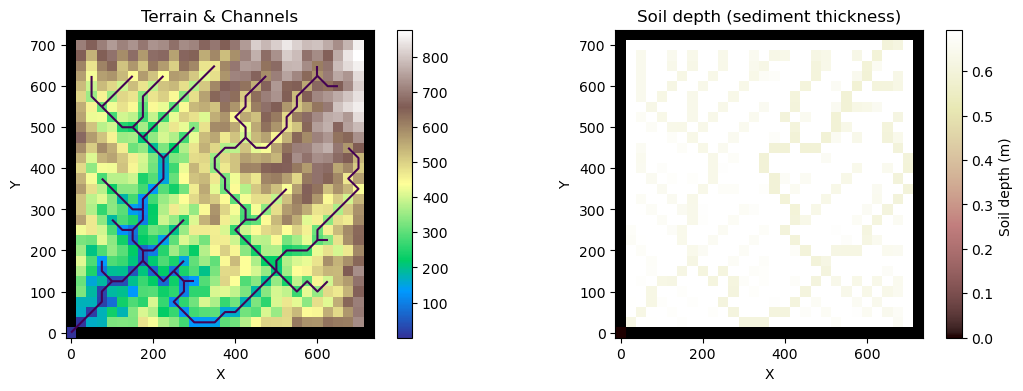

In [122]:
print("Pre-slide Synthesic Landscape")
plt_landscape_evo(profiler,mg)

#### Pre-landslide: Plotting the trunk channel profile with bedrock elevation and sediment thickness:

##### ***Inspired by Dr. Susannah Morey's unpublished works***

Pre-slide Synthesic Landscape


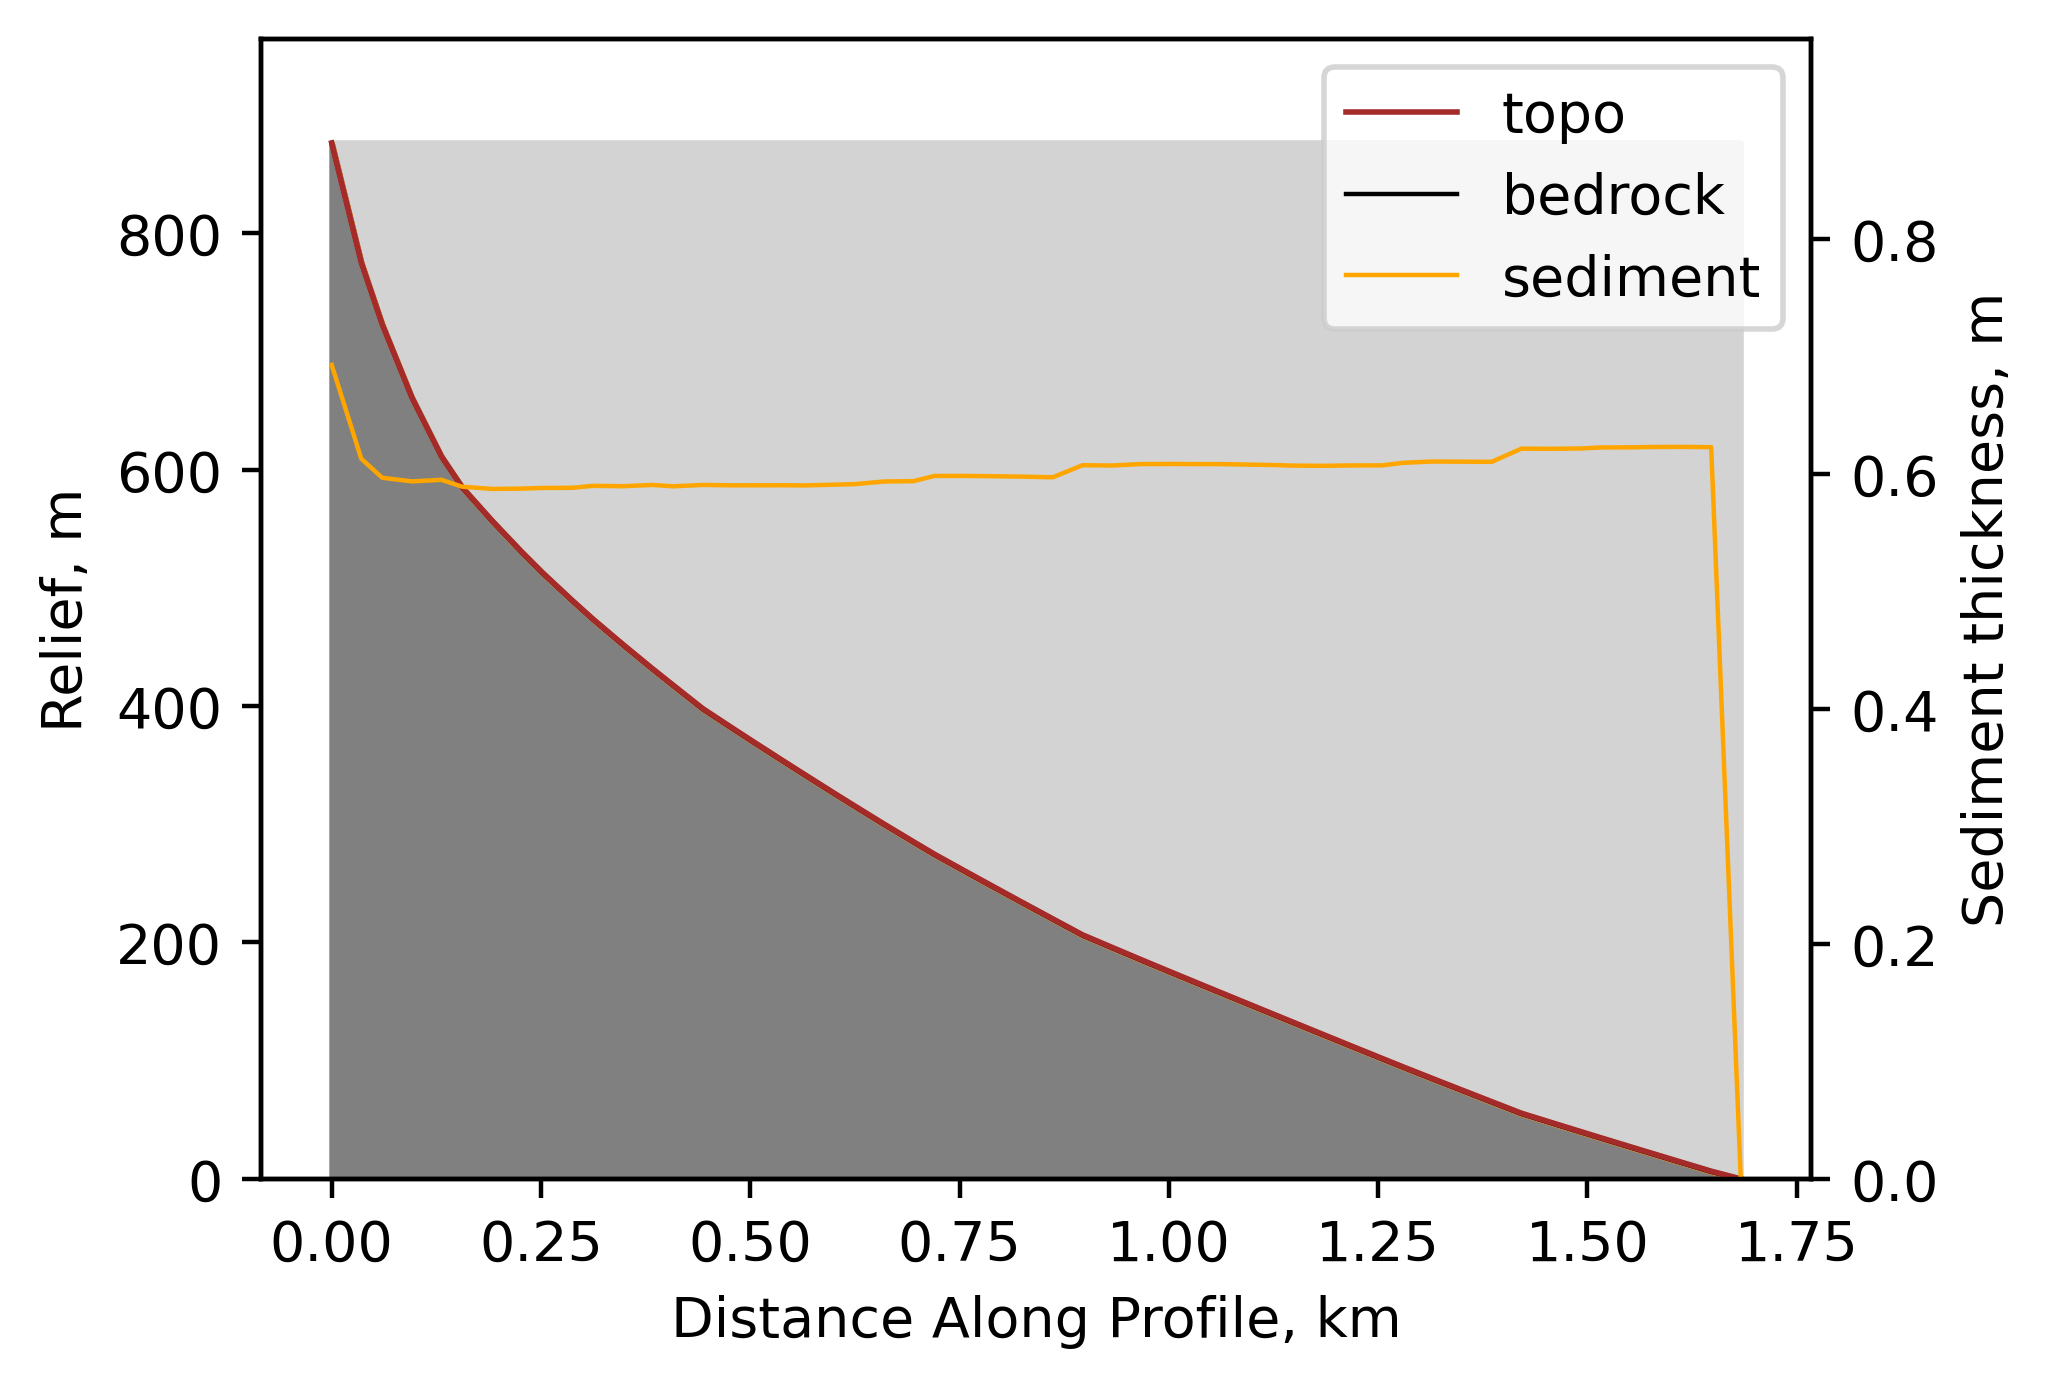

In [123]:
print("Pre-slide Synthesic Landscape")
plot_profile_soil(mg)

In [124]:
# Exporting landlab grid object
with open('pre-slide_fakelandscape.pickle', 'wb') as f:
     pickle.dump(mg, f)

<hr>

### STEP 2: **Good-connectivity scenario**: What if landslide and strong river incision happen together every year?

Load pre-landslide synthetic landscape

In [125]:
# import pickle file of real pre-landslide landlab grid object
with open('pre-slide_fakelandscape.pickle', 'rb') as g:
    mg = pickle.load(g)

### See how landslide-derived sediments affect the evolution of downstream channels.
We run `GravelBedrockEroder` to simulate the fluvial response to landslide-driven sediment pulse through a short period of time (20 years in this case).

**GravelBedrockEroder** is a model for bedrock incision, bed-load transport, and downstream gravel abrasion in a river network with near-threshold channels.

It helps us to model drainage network evolution for a network of rivers that have a layer of gravel alluvium overlying bedrock. 

Bedrock is eroded by a combination of abrasion and plucking. Abrasion per unit channel length is calculated as the product of volumetric sediment discharge and an abrasion coefficient. Sediment produced by abrasion is assumed to go into wash load that is removed from the model domain. Plucking is calculated using a discharge-slope expression, and a user-defined fraction of plucked material is added to the coarse alluvium.

The rate of gravel transport out of a given node is calculated as the product of bankfull discharge, channel gradient (to the 7/6 power), a dimensionless transport coefficient, and an intermittency factor that represents the fraction of time that bankfull flow occurs (Wickert & Schildgen, 2019). It assumes that channels are gravel-bedded and that they instantaneously adjust their width such that bankfull bed shear stress is just slightly higher than the threshold for grain motion. 

`GravelBedrockEroder` operates together with a flow-routing component such as `FlowAccumulator`, so that each grid node has a defined flow direction toward one of its neighbor nodes. 

For more info, parameters, methods of `GravelBedrockEroder`, please visit:
https://landlab.readthedocs.io/en/latest/reference/components/gravel_bedrock_eroder.html

Methods we will utilize for this lab are:

`calc_implied_width()` calculates and returns channel width implied by discharge, slope, and grain diameter.
`calc_sediment_rate_of_change()`updates the rate of thickness change of coarse sediment at each core node.

In [126]:
# Instantiate flow router, with additional multiple flow director for hillslopes
fr = PriorityFloodFlowRouter(
    mg,
    flow_metric="D8",
    separate_hill_flow=True,
    hill_flow_metric="Quinn",
    update_hill_flow_instantaneous=True,
)

# Instantiate hyland model with chosen parameters
hy = BedrockLandslider(
    mg,
    angle_int_frict=0.4,
    cohesion_eff=1e3,
    landslides_return_time=1000,
    landslides_on_boundary_nodes=False,
)

# Instantiate GravelBedrockEroder (GBE)
eroder = GravelBedrockEroder(
    mg, abrasion_coefficient=0.0005,
    coarse_fraction_from_plucking=0.1
)

#### Run the Hyland (Bedrocklandslider) + GravelBedrockEroder (GBE) in every iteration

In [127]:
timestep = 2  # years
landslides_size_all_steps = []

for i in range(10):
     # Insert uplift at core nodes
     mg.at_node["bedrock__elevation"][mg.core_nodes] += U * timestep
     mg.at_node["topographic__elevation"][:] = (
          mg.at_node["bedrock__elevation"] + mg.at_node["soil__depth"]
          )
    
     # # Run the flow router
     fr.run_one_step()                 

     # Run GBE for one time step
     eroder.calc_sediment_rate_of_change(),
     eroder.run_one_step(timestep)

     # Run BedrockLandslider for one time step
     hy.run_one_step(dt=timestep)

     # Store landslide sizes of current time step into general ls_size list
     landslides_size_all_steps = np.append(landslides_size_all_steps, hy.landslides_size)

### Plot drainage network, soil depth, river profiles and sediment thickness in the main channel:

In [128]:
# Derive river network using ChannelProfiler
dx = node_spacing
area_threshold = dx*dx*10.
profiler = ChannelProfiler(mg, number_of_watersheds=1, minimum_channel_threshold=area_threshold, main_channel_only=False)
profiler.run_one_step()

Post-Slide Synthesic Landscape - GOOD CONNECTIVITY


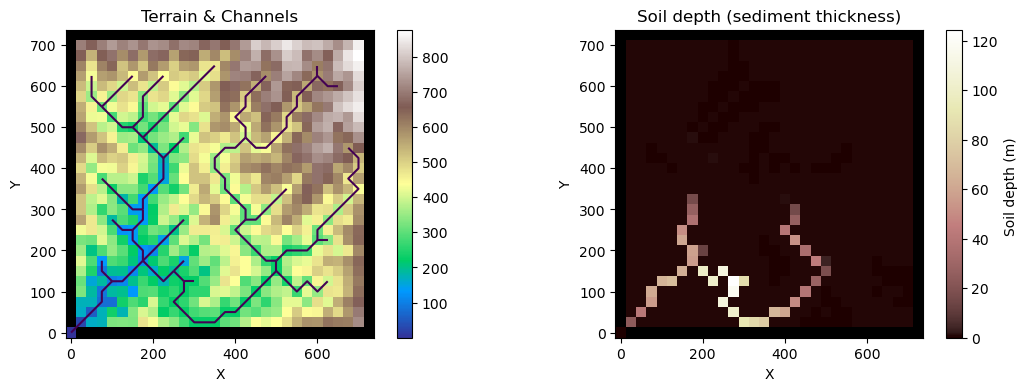

In [129]:
print("Post-Slide Synthesic Landscape - GOOD CONNECTIVITY")
plt_landscape_evo(profiler,mg)

#### Plotting the main trunk channel profile with bedrock elevation and sediment thickness:

Post-Slide Synthesic Landscape - GOOD CONNECTIVITY


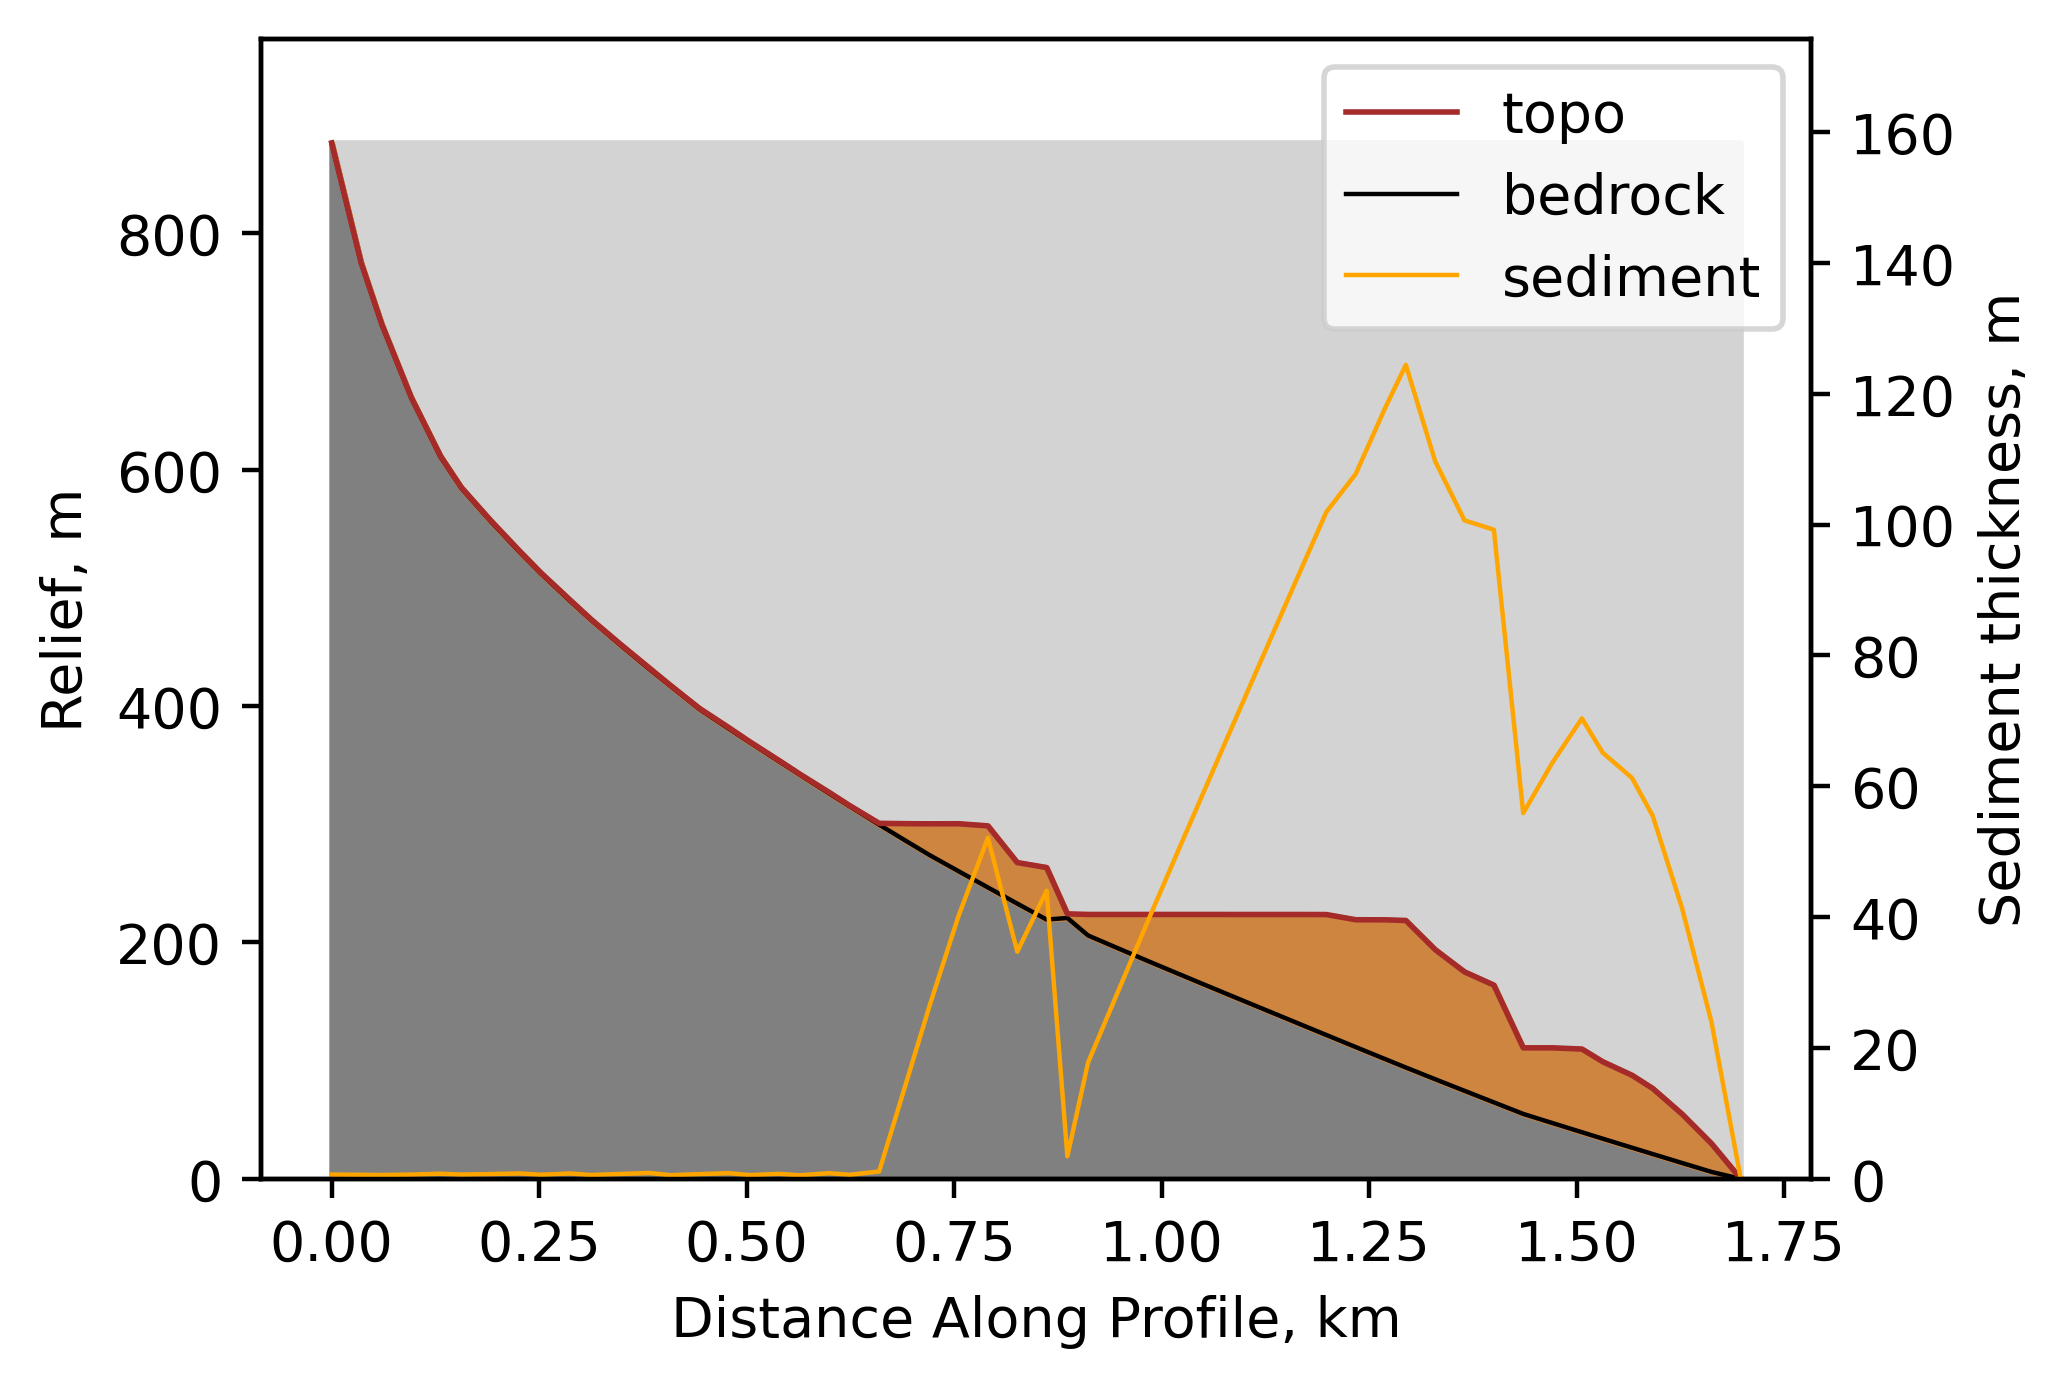

In [130]:
print("Post-Slide Synthesic Landscape - GOOD CONNECTIVITY")
plot_profile_soil(mg)

You may think >60 meters of landslide deposit is unrealistic, but here is a great example showing > ~80 m landslide deposit happened at southwestern Taiwan in 2009:

<img src="shiaolinTWslide.jpg" alt="drawing" width="700"/>
 
*2009 Shaolin Landlside, Taiwan (image from AGU: https://blogs.agu.org/landslideblog/2010/02/02/the-causes-of-the-shiaolin-landslide-disaster-in-taiwan/)*

Export result landlab grid to pickle file

In [131]:
# Exporting landlab grid object
with open('post-slide_fakelandscape_GoodConnect.pickle', 'wb') as f:
     pickle.dump(mg, f)

<hr>

### STEP 3: **Bad-connectivity scenario**:

#### What if catastrophic landslides occur during a short period of time with little or no hydrolic power to for sediment transport, than the river transport and incision kick in after happen together every year?

Load pre-landslide synthetic landscape

In [132]:
# import pickle file of real pre-landslide landlab grid object
with open('pre-slide_fakelandscape.pickle', 'rb') as g:
    mg = pickle.load(g)

#### Run the Hyland (Bedrocklandslider) first WITHOUT any river incition and transport for 20 years

In [133]:
# Instantiate flow router, with additional multiple flow director for hillslopes
fr = PriorityFloodFlowRouter(
    mg,
    flow_metric="D8",
    separate_hill_flow=True,
    hill_flow_metric="Quinn",
    update_hill_flow_instantaneous=True,
)

# Instantiate hyland model with chosen parameters
hy = BedrockLandslider(
    mg,
    angle_int_frict=0.4,
    cohesion_eff=1e3,
    landslides_return_time=1000,
    landslides_on_boundary_nodes=False,
)

# Instantiate GravelBedrockEroder (GBE)
eroder = GravelBedrockEroder(
    mg, abrasion_coefficient=0.0005,
    coarse_fraction_from_plucking=0.1
)

In [134]:
timestep = 2  # years
landslides_size_all_steps = []

for i in range(10):
    # Insert uplift at core nodes
    mg.at_node["bedrock__elevation"][mg.core_nodes] += U * timestep
    mg.at_node["topographic__elevation"][:] = (
        mg.at_node["bedrock__elevation"] + mg.at_node["soil__depth"]
    )

    # Run BedrockLandslider for one time step
    hy.run_one_step(dt=timestep)

    # Store landslide sizes of current time step into general ls_size list
    landslides_size_all_steps = np.append(landslides_size_all_steps, hy.landslides_size)

### Plot drainage network, soil depth, river profiles and sediment thickness in the main channel:

In [135]:
# Derive river network using ChannelProfiler
dx = node_spacing
area_threshold = dx*dx*10.
profiler = ChannelProfiler(mg, number_of_watersheds=1, minimum_channel_threshold=area_threshold, main_channel_only=False)
profiler.run_one_step()

Post-Slide Synthesic Landscape - BAD CONNECTIVITY
1. Before landslide sediment been transported to the main stream


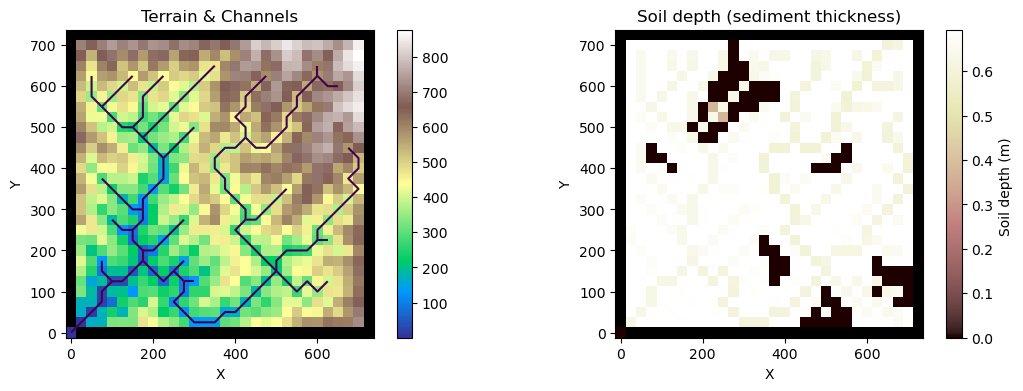

In [136]:
print("Post-Slide Synthesic Landscape - BAD CONNECTIVITY")
print("1. Before landslide sediment been transported to the main stream")
plt_landscape_evo(profiler,mg)

Post-Slide Synthesic Landscape - BAD CONNECTIVITY
1. Before landslide sediment been transported to the main stream


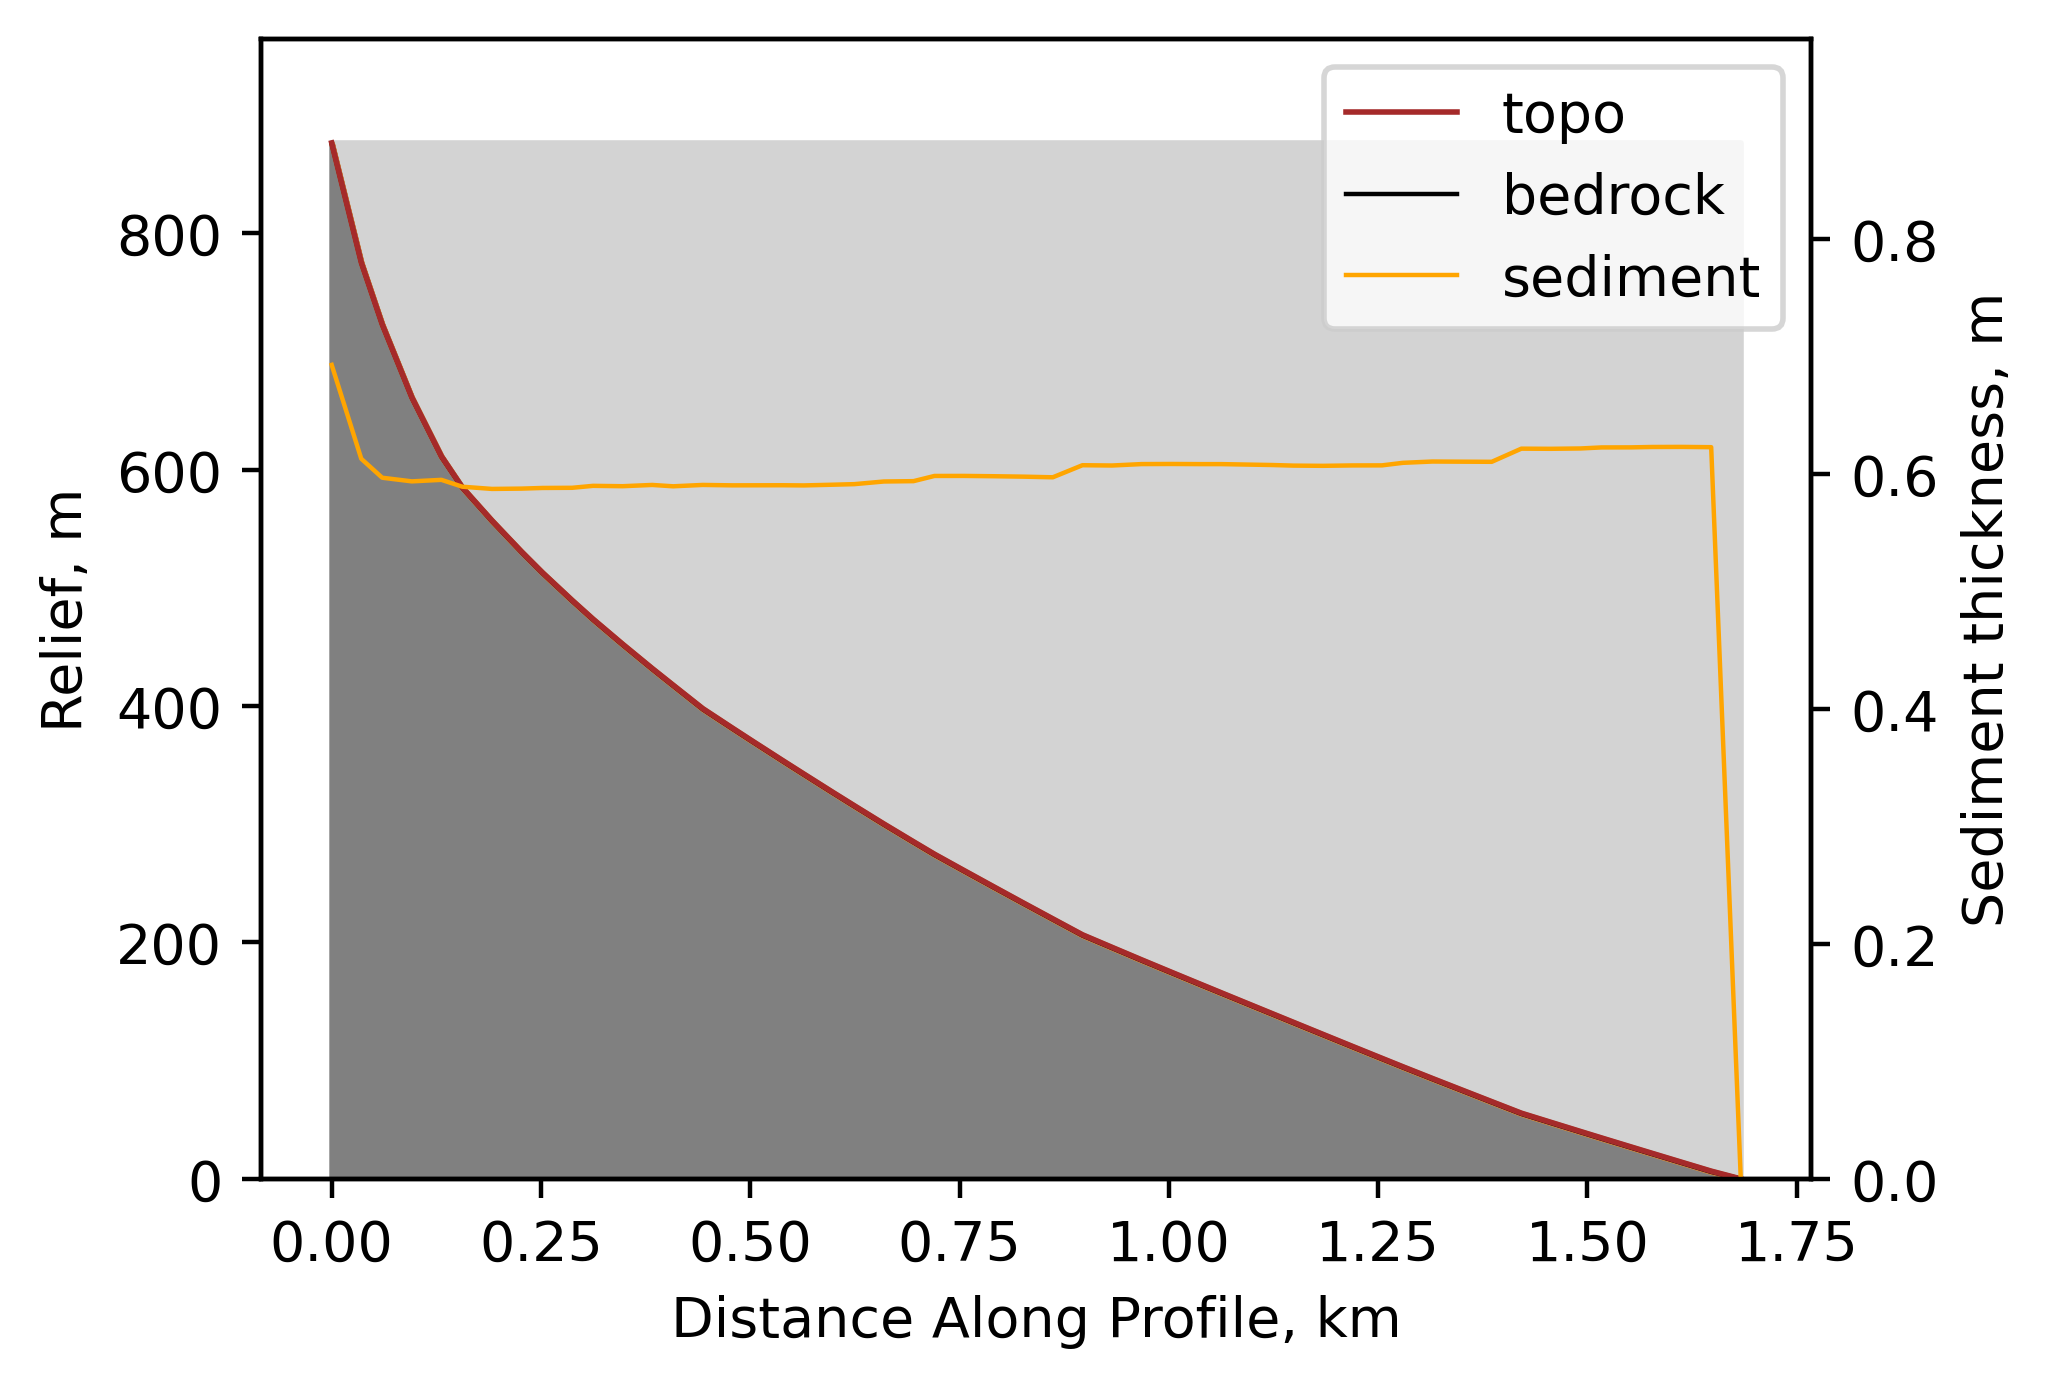

In [137]:
print("Post-Slide Synthesic Landscape - BAD CONNECTIVITY")
print("1. Before landslide sediment been transported to the main stream")
plot_profile_soil(mg)

In [138]:
# Exporting landlab grid object
with open('post-slide_fakelandscape_BADConnect_beforeriver.pickle', 'wb') as f:
     pickle.dump(mg, f)

#### Kick in river incition and transport with GravelBedrockEroder **20 years** after large landslides

In [139]:
# import pickle file of real pre-landslide landlab grid object
with open('post-slide_fakelandscape_BADConnect_beforeriver.pickle', 'rb') as g:
    mg = pickle.load(g)

In [140]:
# Instantiate flow router, with additional multiple flow director for hillslopes
fr = PriorityFloodFlowRouter(
    mg,
    flow_metric="D8",
    separate_hill_flow=True,
    hill_flow_metric="Quinn",
    update_hill_flow_instantaneous=True,
)

# Instantiate GravelBedrockEroder (GBE)
eroder = GravelBedrockEroder(
    mg, abrasion_coefficient=0.0005,
    coarse_fraction_from_plucking=0.1
)

In [141]:
elev = mg.at_node["topographic__elevation"]

rock_elev = mg.at_node["bedrock__elevation"]
elev = mg.at_node["topographic__elevation"]

for i in range(20):
     rock_elev[mg.core_nodes] += 0.001
     elev[mg.core_nodes] += 0.001
     fr.run_one_step()
     eroder.calc_sediment_rate_of_change(),
     eroder.run_one_step(1.0)

# Derive river network using ChannelProfiler
dx = node_spacing
area_threshold = dx*dx*10.
profiler = ChannelProfiler(mg, number_of_watersheds=1, minimum_channel_threshold=area_threshold, main_channel_only=False)
profiler.run_one_step()

Post-Slide Synthesic Landscape - BAD CONNECTIVITY
2. River start landslide sediment been transported to the main stream for 20 years


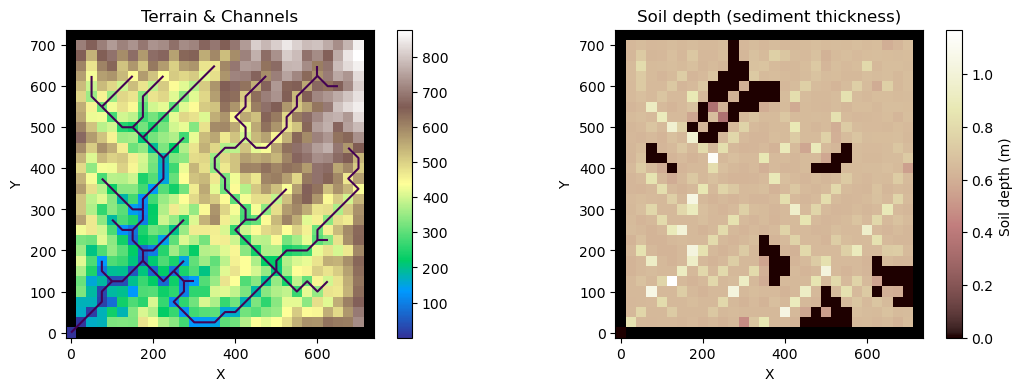

In [142]:
print("Post-Slide Synthesic Landscape - BAD CONNECTIVITY")
print("2. River start landslide sediment been transported to the main stream for 20 years")
plt_landscape_evo(profiler,mg)

Post-Slide Synthesic Landscape - BAD CONNECTIVITY
2. River start landslide sediment been transported to the main stream for 20 years


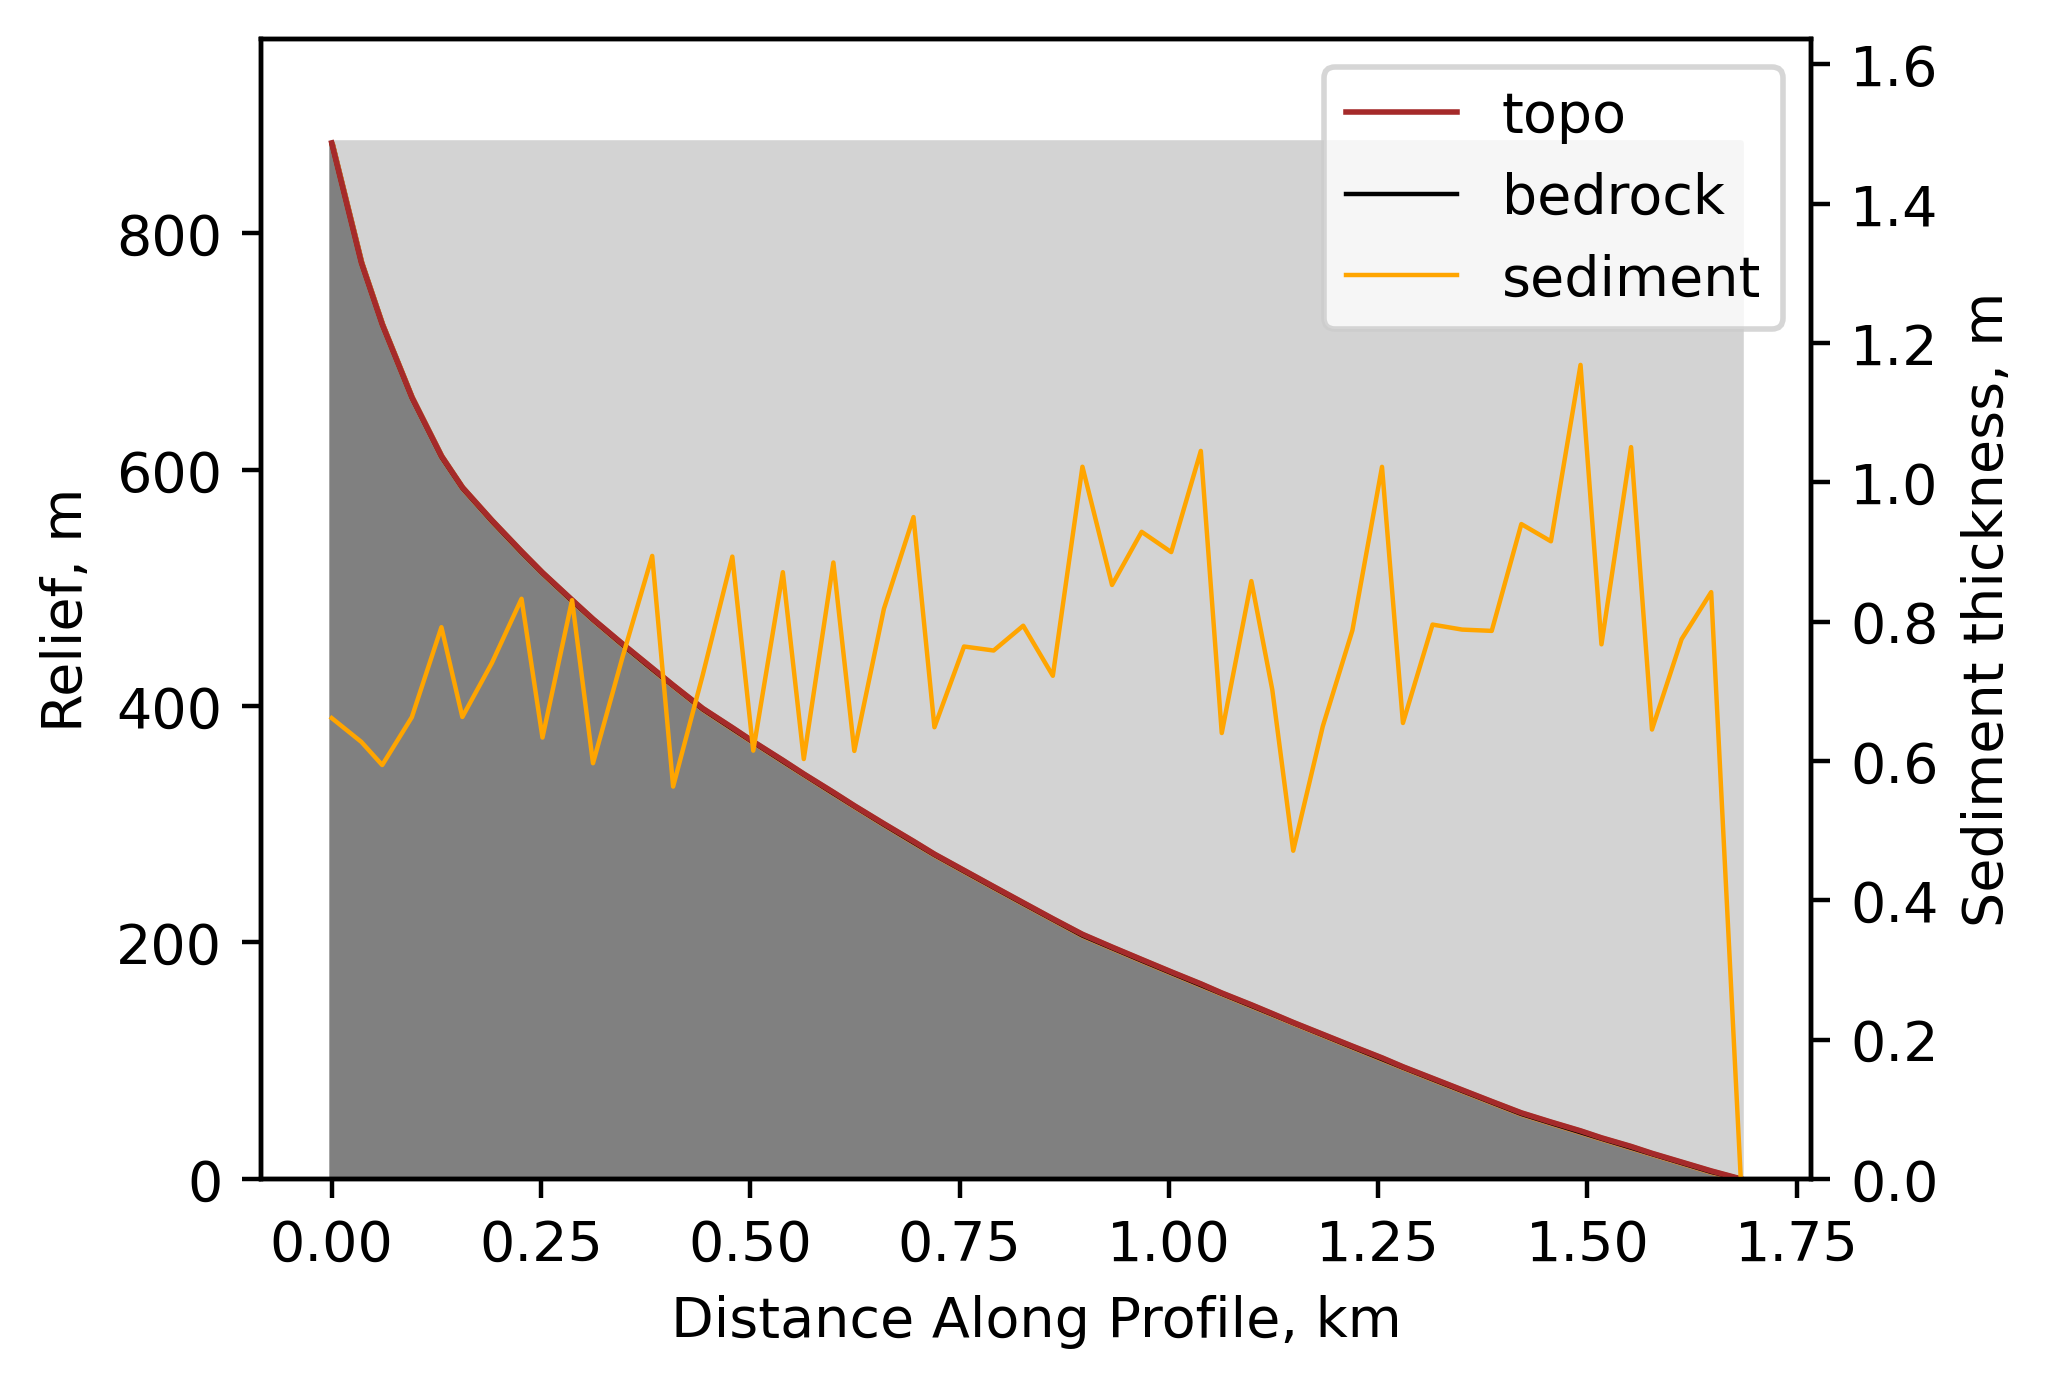

In [143]:
print("Post-Slide Synthesic Landscape - BAD CONNECTIVITY")
print("2. River start landslide sediment been transported to the main stream for 20 years")
plot_profile_soil(mg)

#### Kick in river incition and transport with GravelBedrockEroder **200 years** after large landslides

In [144]:
# import pickle file of real pre-landslide landlab grid object
with open('post-slide_fakelandscape_BADConnect_beforeriver.pickle', 'rb') as g:
    mg = pickle.load(g)

In [145]:
# Instantiate flow router, with additional multiple flow director for hillslopes
fr = PriorityFloodFlowRouter(
    mg,
    flow_metric="D8",
    separate_hill_flow=True,
    hill_flow_metric="Quinn",
    update_hill_flow_instantaneous=True,
)

# Instantiate GravelBedrockEroder (GBE)
eroder = GravelBedrockEroder(
    mg, abrasion_coefficient=0.0005,
    coarse_fraction_from_plucking=0.1
)

In [146]:
elev = mg.at_node["topographic__elevation"]

rock_elev = mg.at_node["bedrock__elevation"]
elev = mg.at_node["topographic__elevation"]

for i in range(20):
     rock_elev[mg.core_nodes] += 0.001
     elev[mg.core_nodes] += 0.001
     fr.run_one_step()
     eroder.calc_sediment_rate_of_change(),
     eroder.run_one_step(10)

# Derive river network using ChannelProfiler
dx = node_spacing
area_threshold = dx*dx*10.
profiler = ChannelProfiler(mg, number_of_watersheds=1, minimum_channel_threshold=area_threshold, main_channel_only=False)
profiler.run_one_step()

Post-Slide Synthesic Landscape - BAD CONNECTIVITY
3. River start landslide sediment been transported to the main stream for 200 years


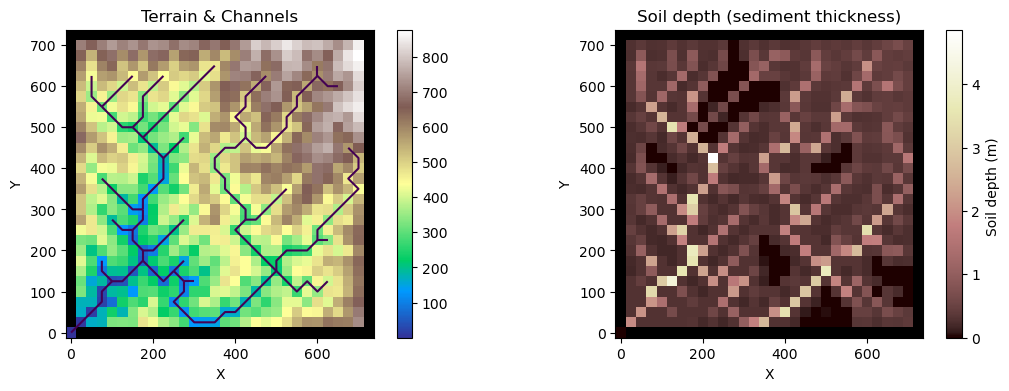

In [147]:
print("Post-Slide Synthesic Landscape - BAD CONNECTIVITY")
print("3. River start landslide sediment been transported to the main stream for 200 years")
plt_landscape_evo(profiler,mg)

Post-Slide Synthesic Landscape - BAD CONNECTIVITY
3. River start landslide sediment been transported to the main stream for 200 years


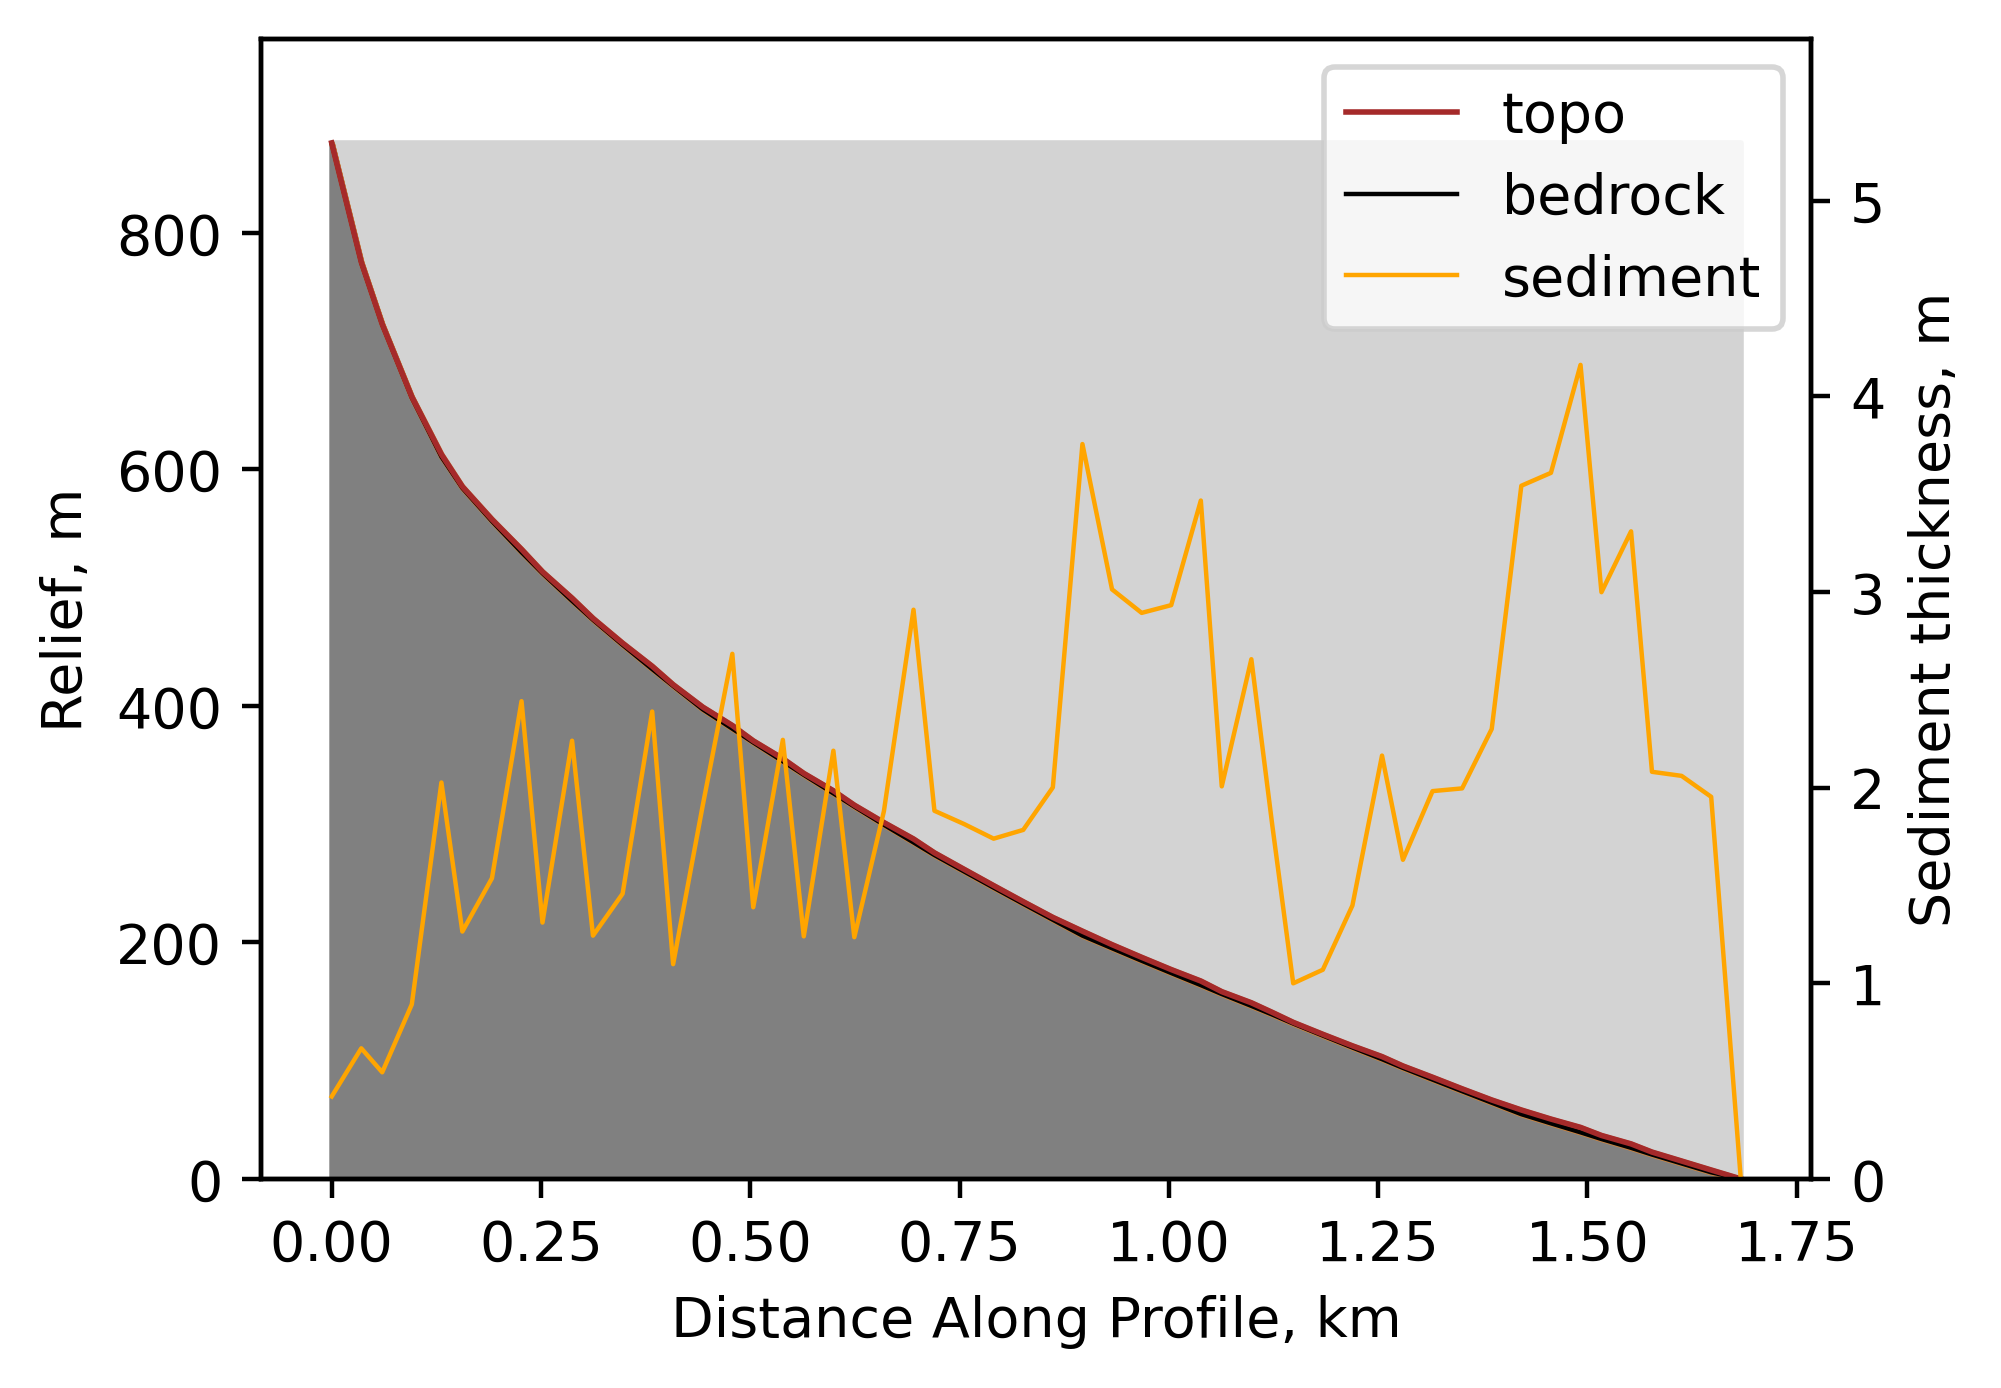

In [148]:
print("Post-Slide Synthesic Landscape - BAD CONNECTIVITY")
print("3. River start landslide sediment been transported to the main stream for 200 years")
plot_profile_soil(mg)

#### Kick in river incition and transport with GravelBedrockEroder **2000 years** after large landslides

In [149]:
# import pickle file of real pre-landslide landlab grid object
with open('post-slide_fakelandscape_BADConnect_beforeriver.pickle', 'rb') as g:
    mg = pickle.load(g)

In [150]:
# Instantiate flow router, with additional multiple flow director for hillslopes
fr = PriorityFloodFlowRouter(
    mg,
    flow_metric="D8",
    separate_hill_flow=True,
    hill_flow_metric="Quinn",
    update_hill_flow_instantaneous=True,
)

# Instantiate GravelBedrockEroder (GBE)
eroder = GravelBedrockEroder(
    mg, abrasion_coefficient=0.0005,
    coarse_fraction_from_plucking=0.1
)

In [151]:
elev = mg.at_node["topographic__elevation"]

rock_elev = mg.at_node["bedrock__elevation"]
elev = mg.at_node["topographic__elevation"]

for i in range(20):
     rock_elev[mg.core_nodes] += 0.001
     elev[mg.core_nodes] += 0.001
     fr.run_one_step()
     eroder.calc_sediment_rate_of_change(),
     eroder.run_one_step(100)

# Derive river network using ChannelProfiler
dx = node_spacing
area_threshold = dx*dx*10.
profiler = ChannelProfiler(mg, number_of_watersheds=1, minimum_channel_threshold=area_threshold, main_channel_only=False)
profiler.run_one_step()

Post-Slide Synthesic Landscape - BAD CONNECTIVITY
4. River start landslide sediment been transported to the main stream for 2000 years


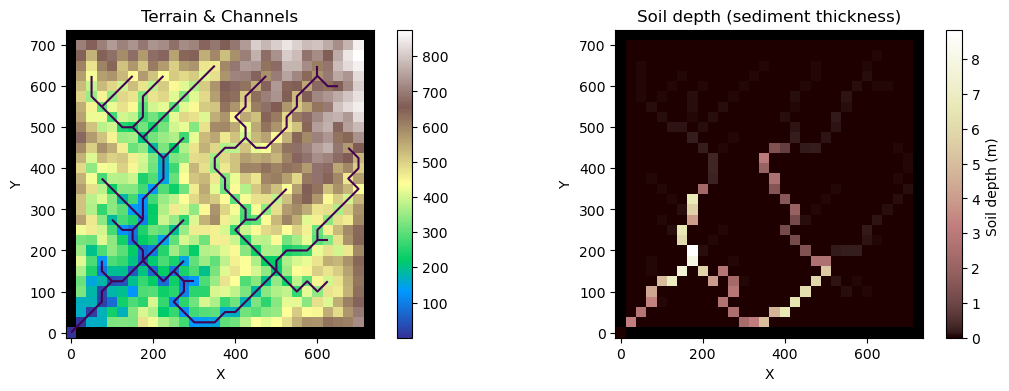

In [152]:
print("Post-Slide Synthesic Landscape - BAD CONNECTIVITY")
print("4. River start landslide sediment been transported to the main stream for 2000 years")
plt_landscape_evo(profiler,mg)

Post-Slide Synthesic Landscape - BAD CONNECTIVITY
4. River start landslide sediment been transported to the main stream for 2000 years


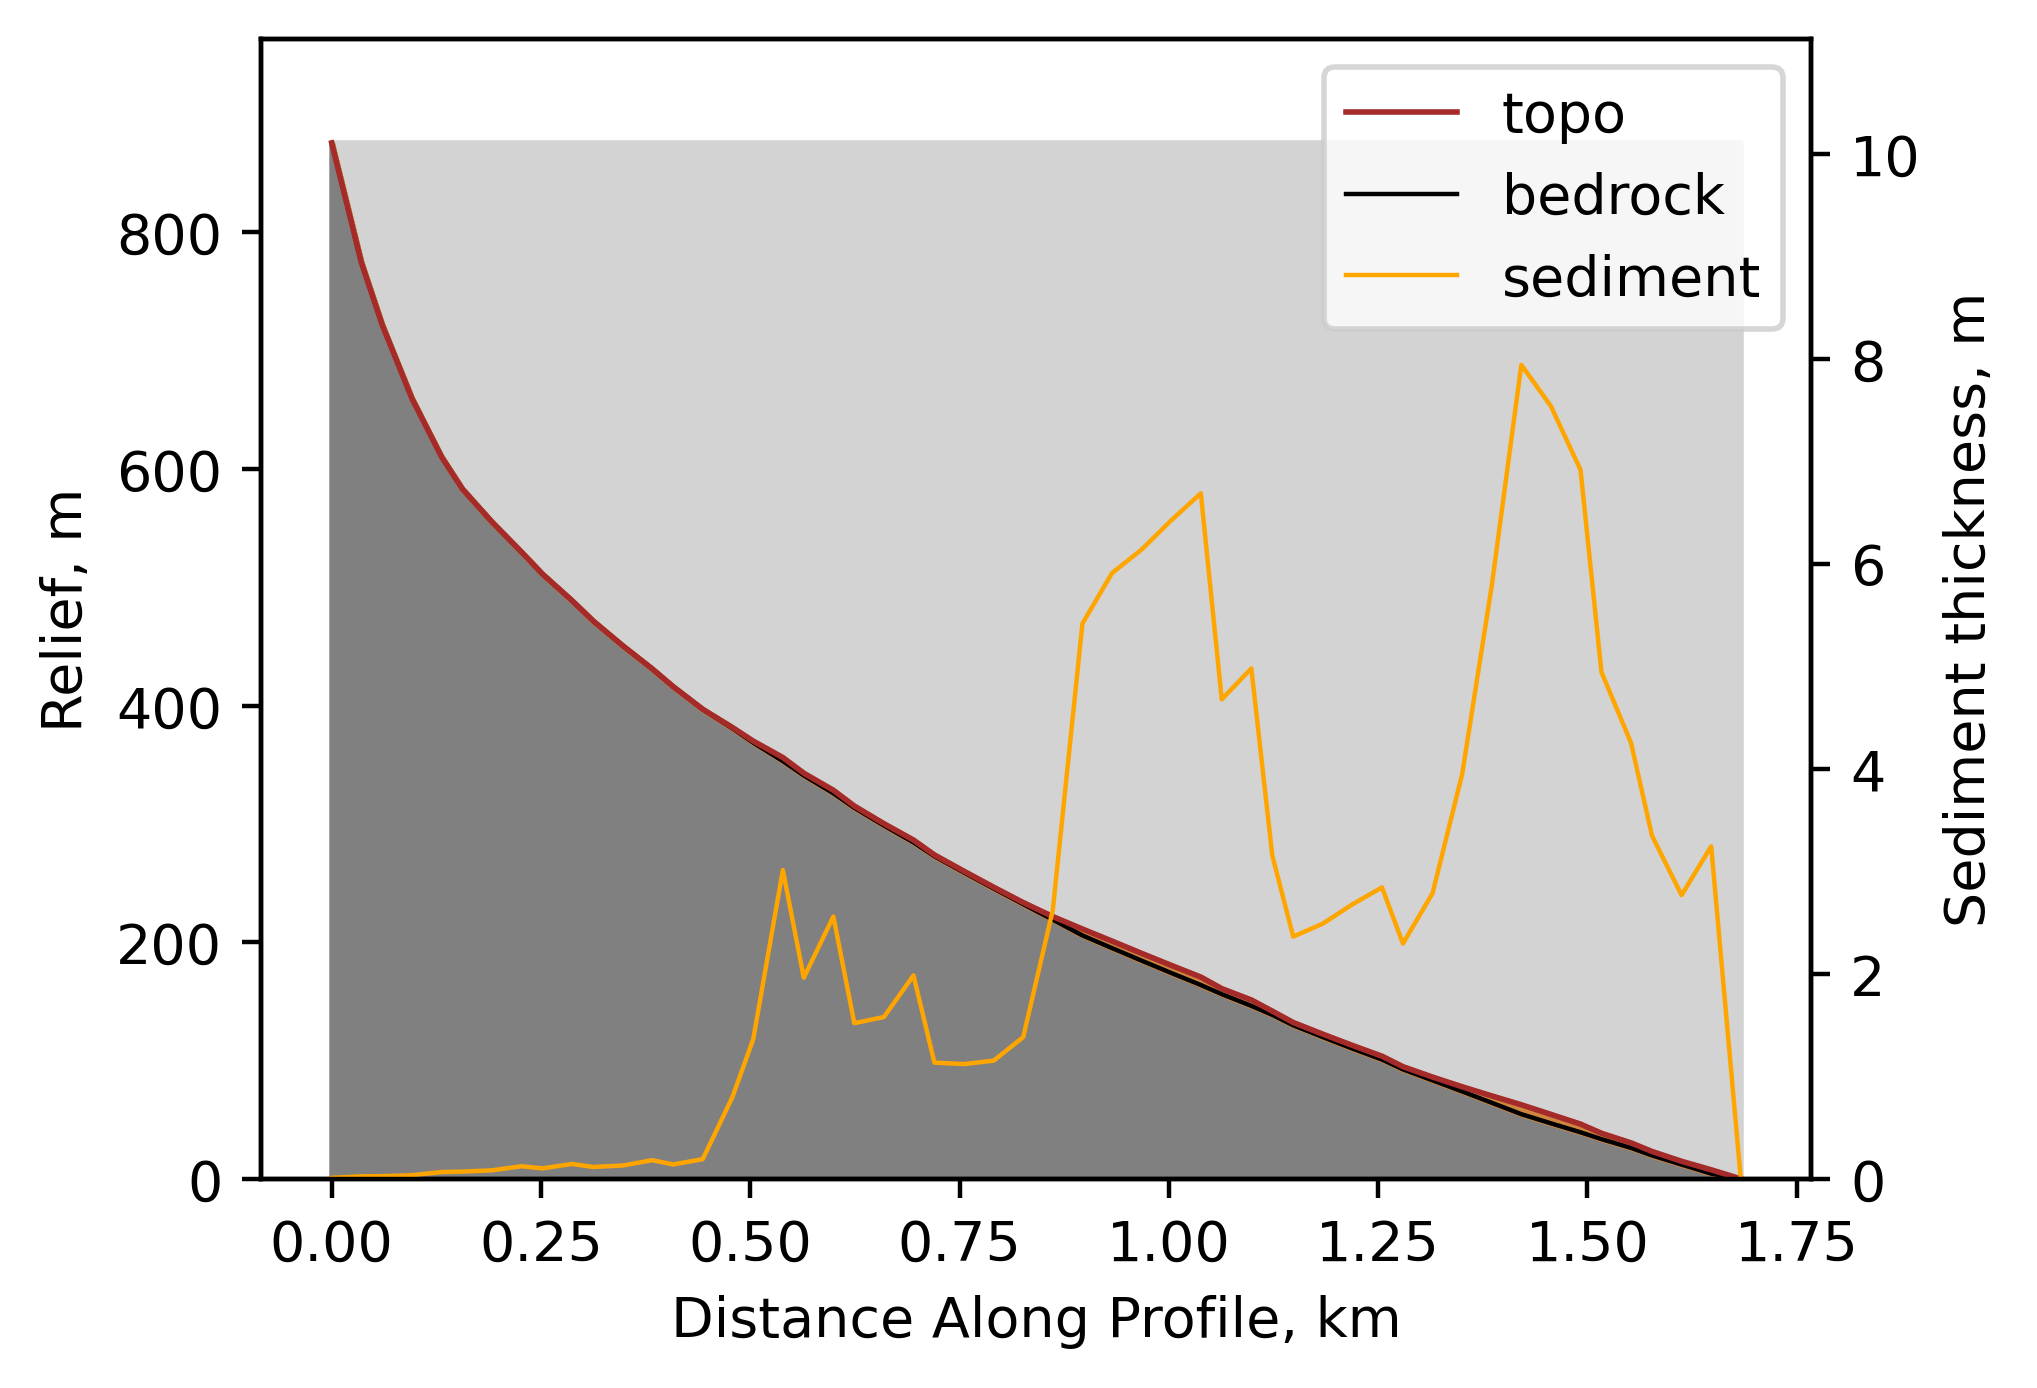

In [153]:
print("Post-Slide Synthesic Landscape - BAD CONNECTIVITY")
print("4. River start landslide sediment been transported to the main stream for 2000 years")
plot_profile_soil(mg)

#### Kick in river incition and transport with GravelBedrockEroder **20000 years** after large landslides

In [154]:
# import pickle file of real pre-landslide landlab grid object
with open('post-slide_fakelandscape_BADConnect_beforeriver.pickle', 'rb') as g:
    mg = pickle.load(g)

In [155]:
# Instantiate flow router, with additional multiple flow director for hillslopes
fr = PriorityFloodFlowRouter(
    mg,
    flow_metric="D8",
    separate_hill_flow=True,
    hill_flow_metric="Quinn",
    update_hill_flow_instantaneous=True,
)

# Instantiate GravelBedrockEroder (GBE)
eroder = GravelBedrockEroder(
    mg, abrasion_coefficient=0.0005,
    coarse_fraction_from_plucking=0.1
)

In [156]:
elev = mg.at_node["topographic__elevation"]

rock_elev = mg.at_node["bedrock__elevation"]
elev = mg.at_node["topographic__elevation"]

for i in range(20):
     rock_elev[mg.core_nodes] += 0.001
     elev[mg.core_nodes] += 0.001
     fr.run_one_step()
     eroder.calc_sediment_rate_of_change(),
     eroder.run_one_step(1000)

# Derive river network using ChannelProfiler
dx = node_spacing
area_threshold = dx*dx*10.
profiler = ChannelProfiler(mg, number_of_watersheds=1, minimum_channel_threshold=area_threshold, main_channel_only=False)
profiler.run_one_step()

Post-Slide Synthesic Landscape - BAD CONNECTIVITY
5. River start landslide sediment been transported to the main stream for 20000 years


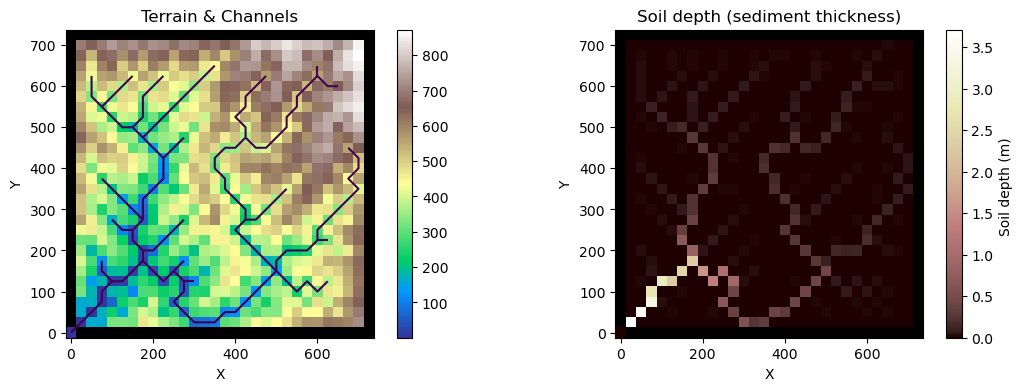

In [157]:
print("Post-Slide Synthesic Landscape - BAD CONNECTIVITY")
print("5. River start landslide sediment been transported to the main stream for 20000 years")
plt_landscape_evo(profiler,mg)

Post-Slide Synthesic Landscape - BAD CONNECTIVITY
5. River start landslide sediment been transported to the main stream for 20000 years


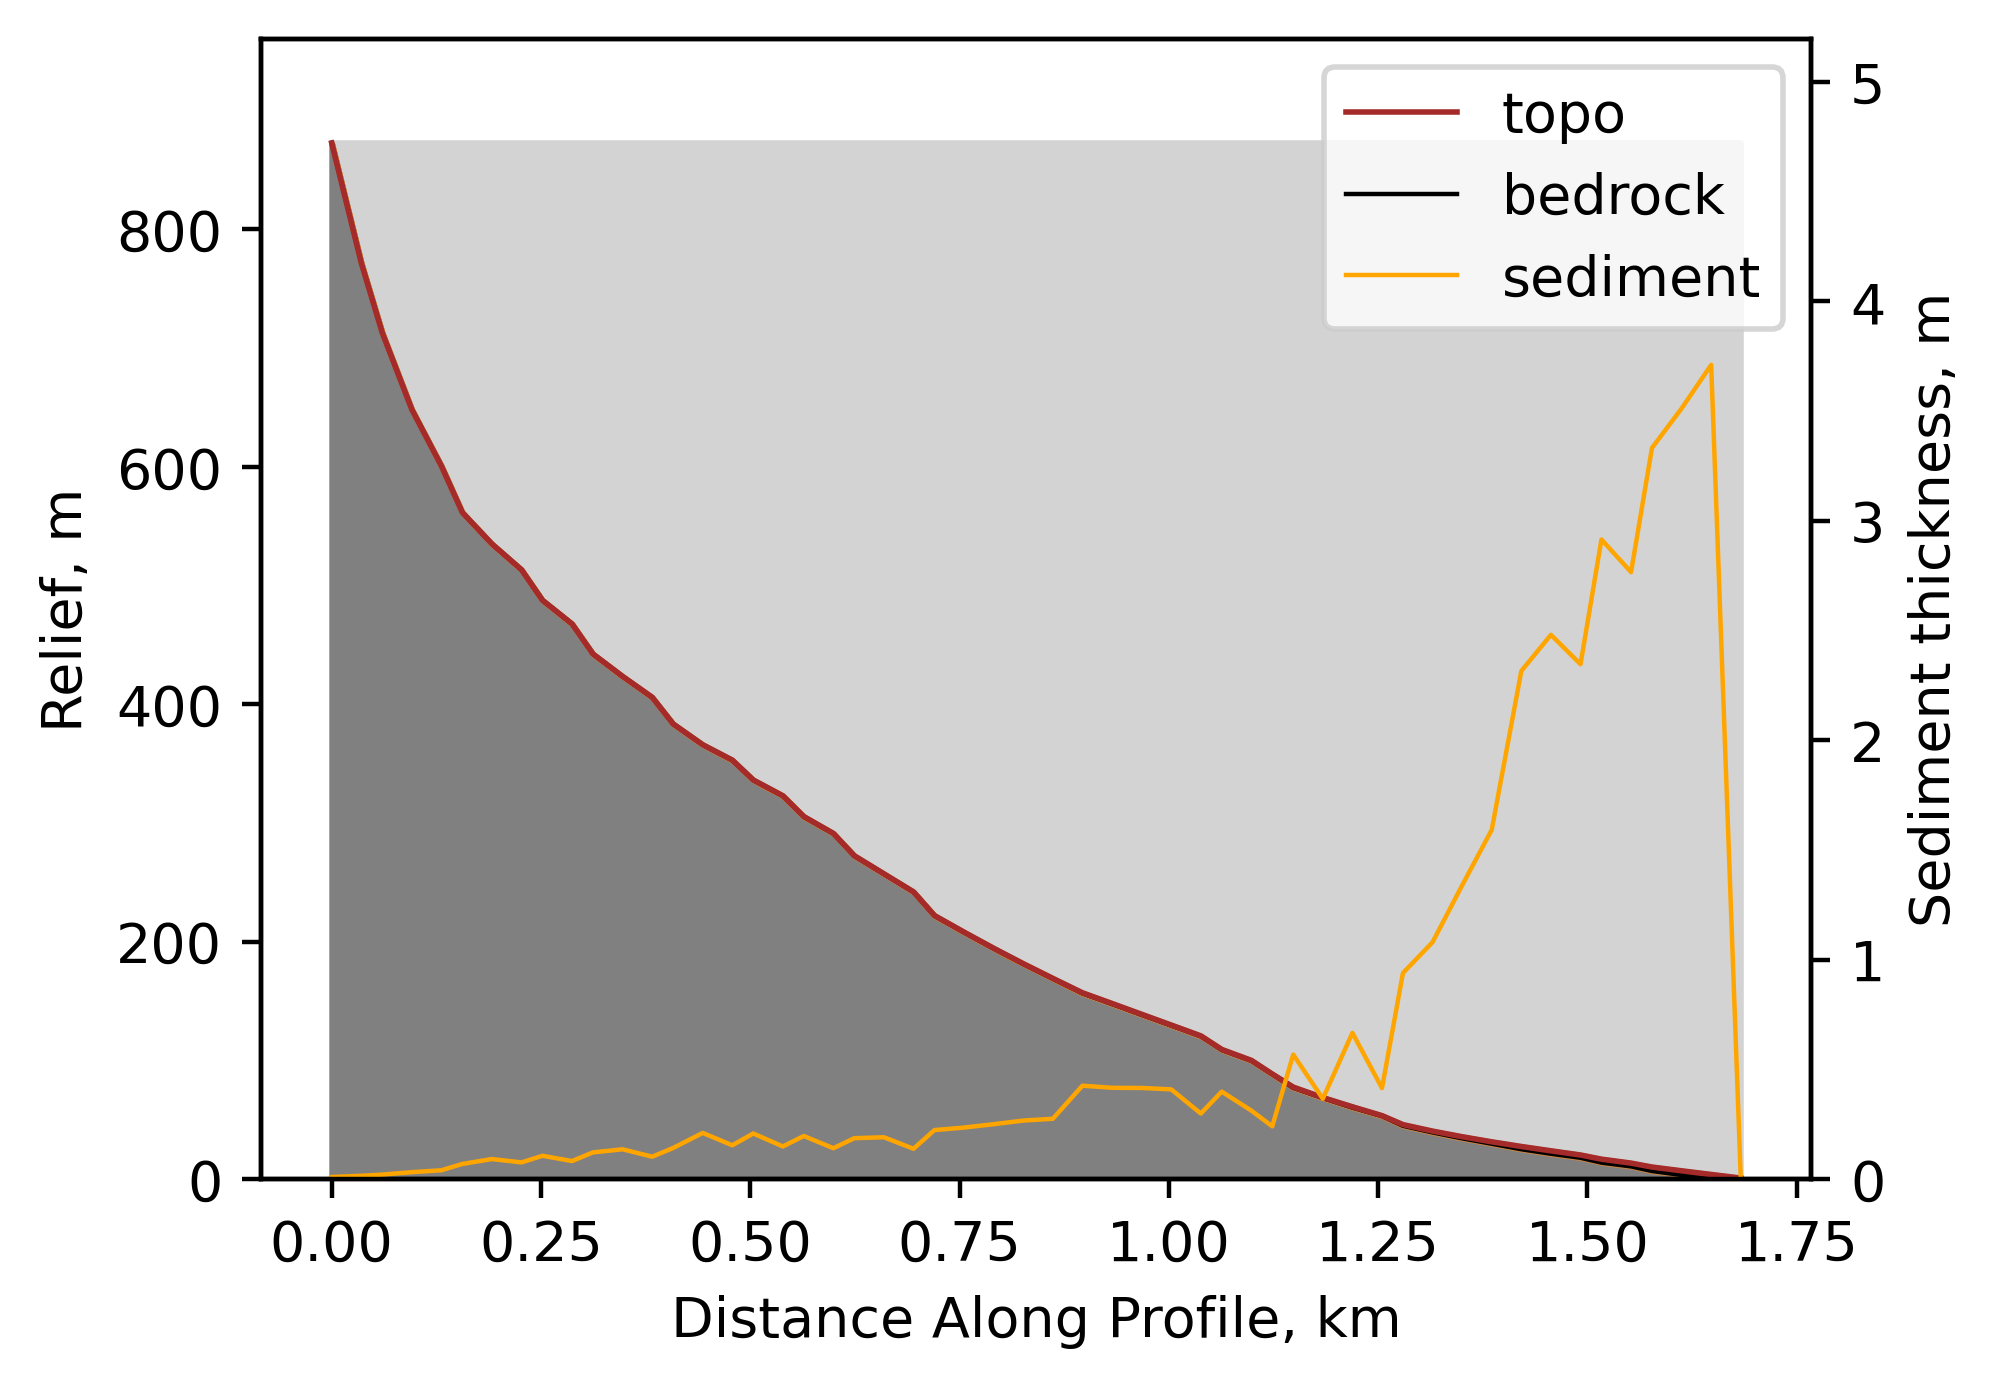

In [158]:
print("Post-Slide Synthesic Landscape - BAD CONNECTIVITY")
print("5. River start landslide sediment been transported to the main stream for 20000 years")
plot_profile_soil(mg)

<hr>

### STEP EXTRA: load and analyze real landscape (Bad Connectivity Scenario)

### Extra.1: Load real landscape before a landslide event

In [159]:
# import pickle file of real pre-landslide landlab grid object
with open('pre-slide_reallandscape.pickle', 'rb') as g:
    mg2 = pickle.load(g)

# Derive river network using ChannelProfiler
dx = node_spacing
area_threshold = dx*dx*10.
profiler2 = ChannelProfiler(mg2, number_of_watersheds=1, minimum_channel_threshold=area_threshold, main_channel_only=False)
profiler2.run_one_step()

Pre-Slide Real Landscape


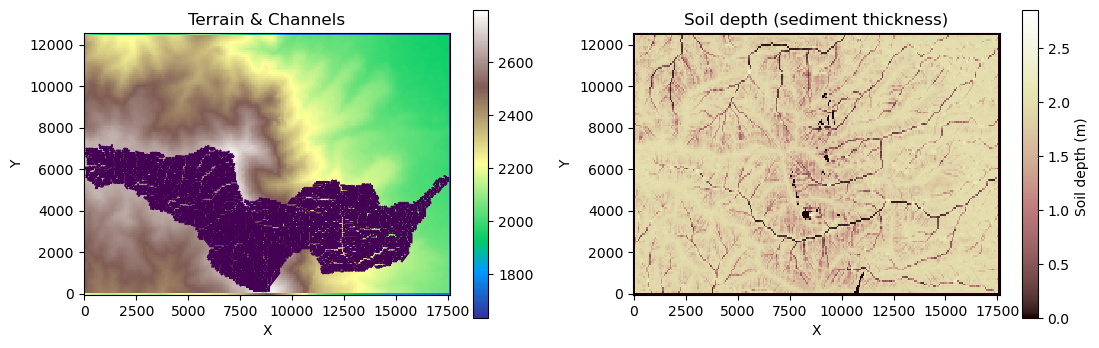

In [160]:
print("Pre-Slide Real Landscape")
plt_landscape_evo(profiler2, mg2)

Pre-Slide Real Landscape


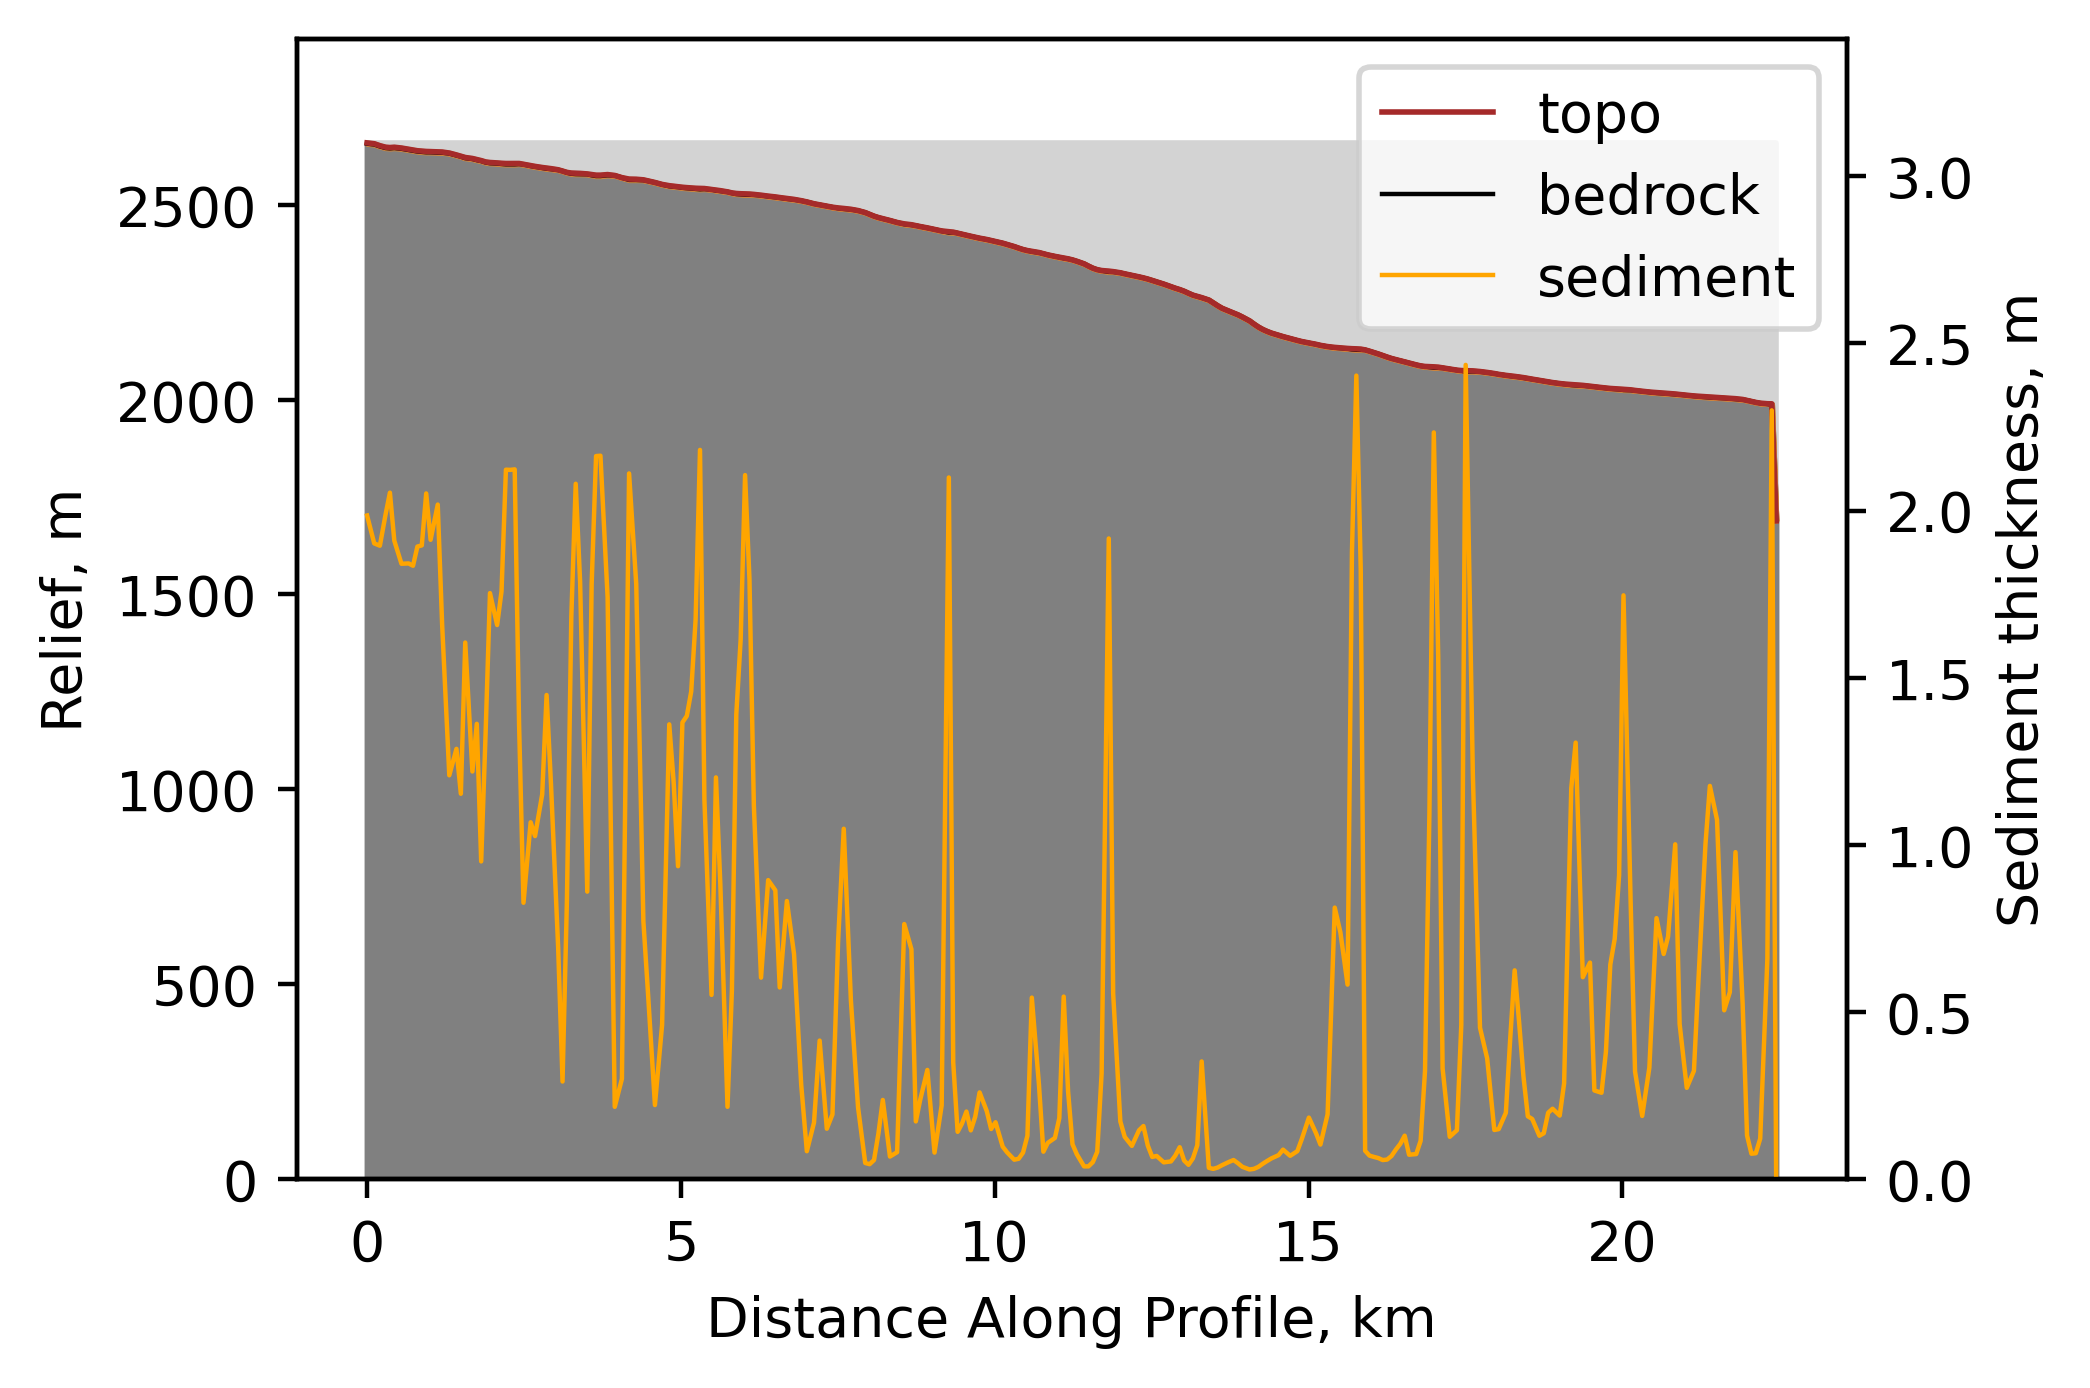

In [161]:
print("Pre-Slide Real Landscape")
plot_profile_soil(mg2)

<hr>

### Load real landscape after a landslide event using **`BedrockLandslider`** (BRL)

In [171]:
# Import pickle file of real post-landslide landlab grid object
with open('post-slide_reallandscape_BRL.pickle', 'rb') as g:
    mg3 = pickle.load(g)

# Derive river network using ChannelProfiler
dx = node_spacing
area_threshold = dx*dx*10.
profiler3 = ChannelProfiler(mg3, number_of_watersheds=1, minimum_channel_threshold=area_threshold, main_channel_only=False)
profiler3.run_one_step()

Post-Slide Real Landscape (BRL) - BAD CONNECTIVITY
Before river sediment transport and incision


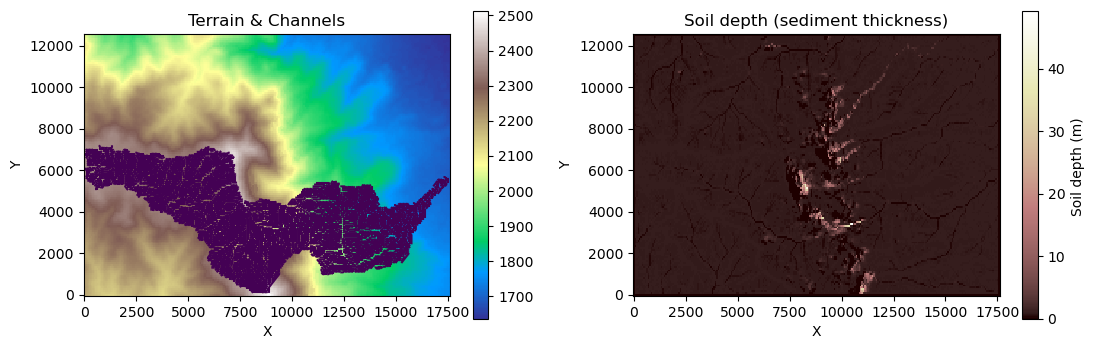

In [172]:
print("Post-Slide Real Landscape (BRL) - BAD CONNECTIVITY")
print("Before river sediment transport and incision")
plt_landscape_evo(profiler3, mg3)

Post-Slide Real Landscape (BRL) - BAD CONNECTIVITY
Before river sediment transport and incision


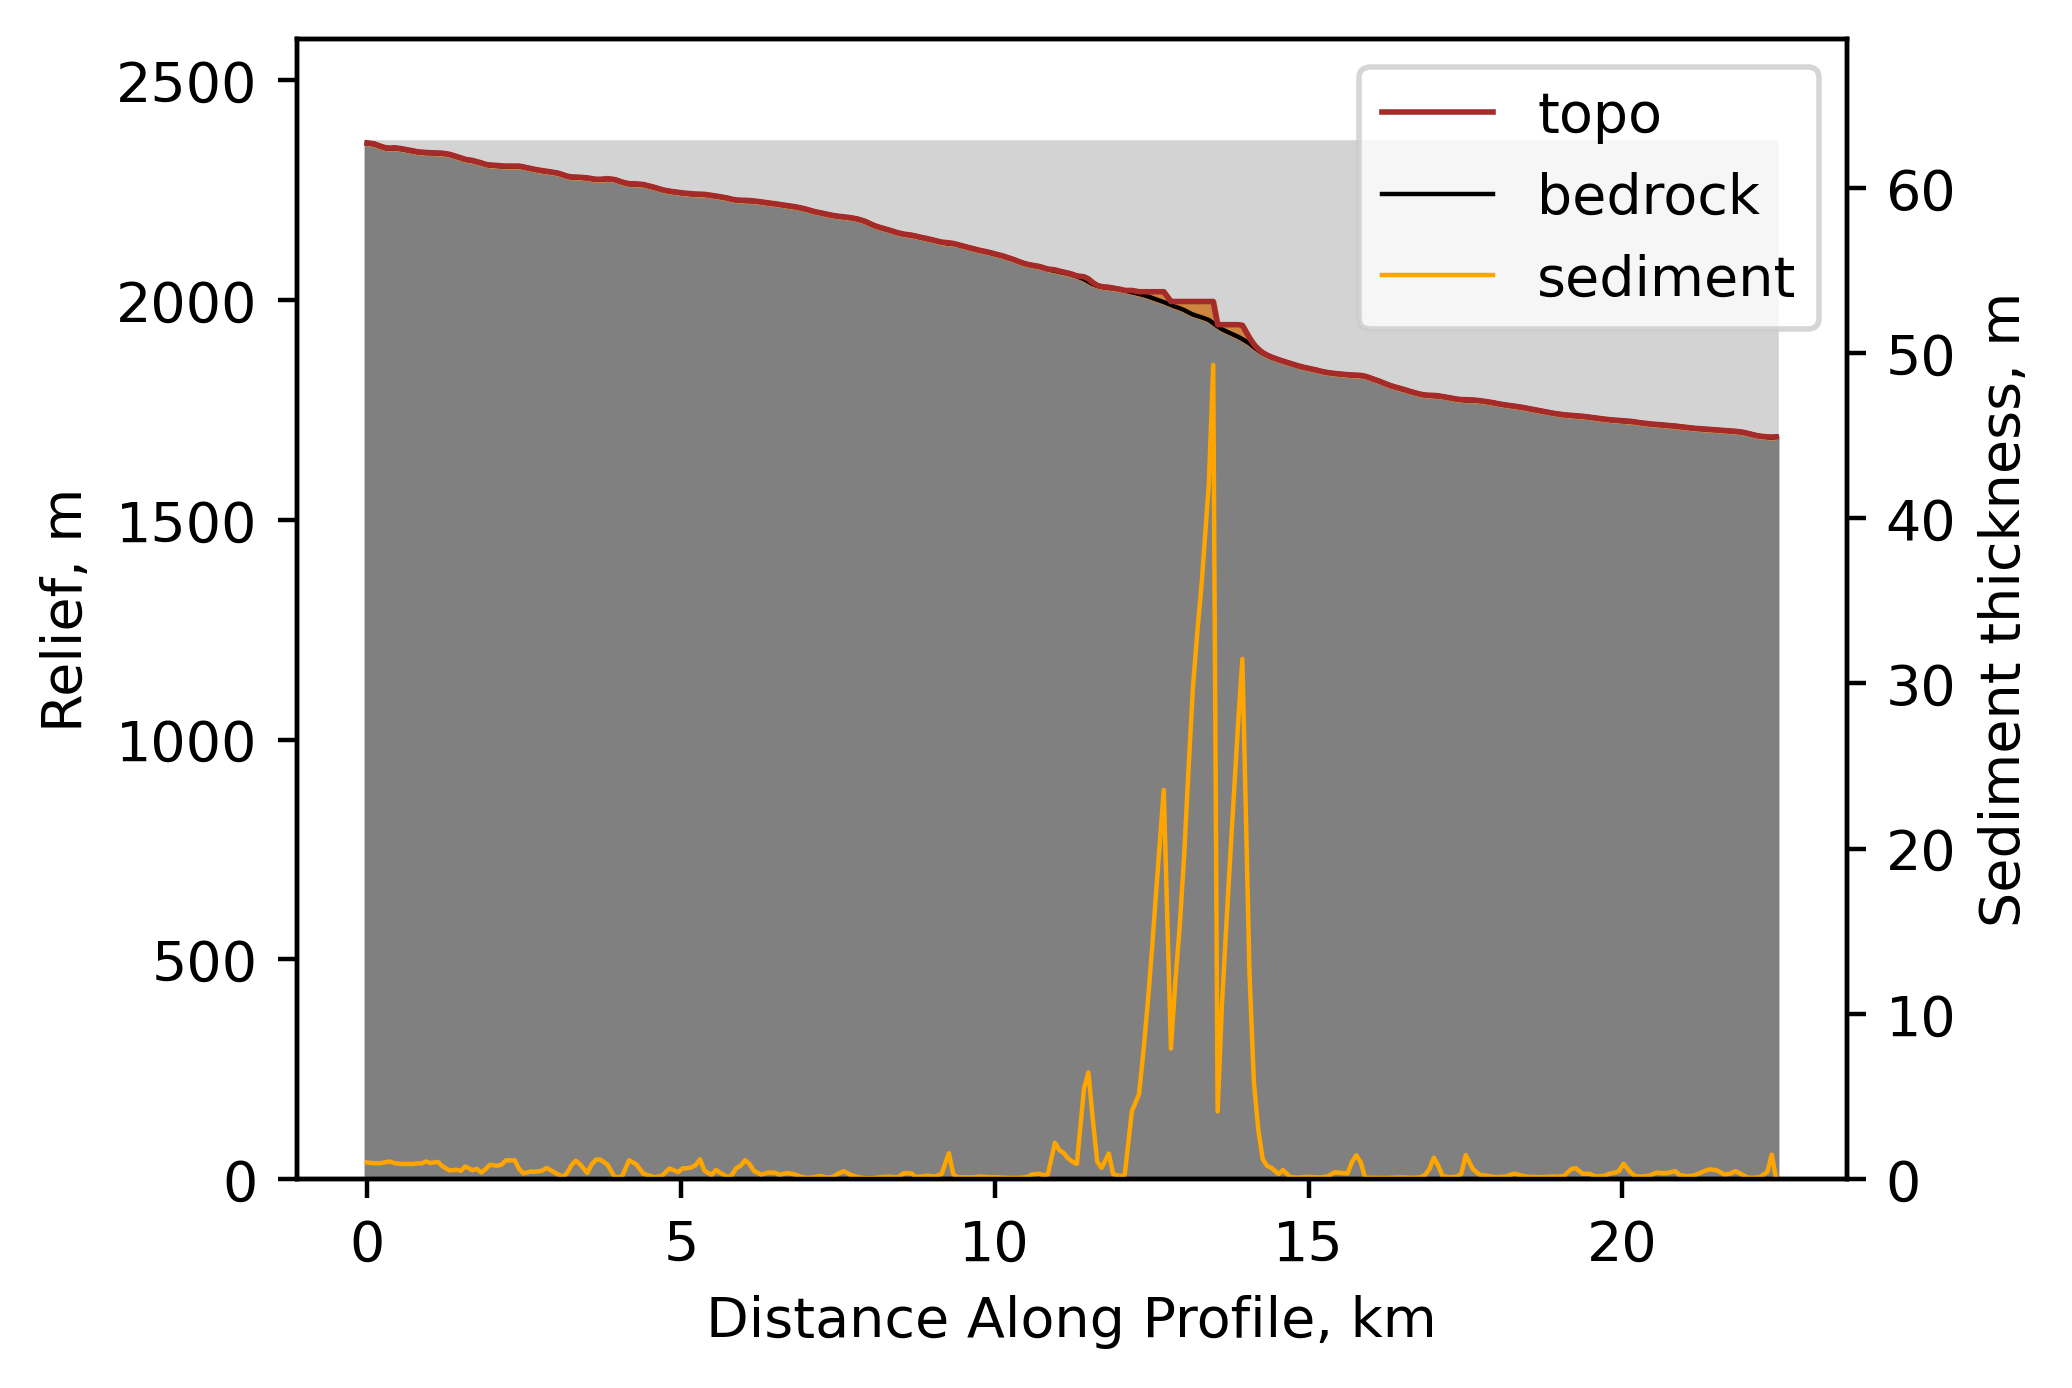

In [173]:
print("Post-Slide Real Landscape (BRL) - BAD CONNECTIVITY")
print("Before river sediment transport and incision")
plot_profile_soil(mg3)

#### Run GravelBedrockEroder on imported post-landslide (BRL) landscape DEM

In [174]:
# Instantiate flow router, with additional multiple flow director for hillslopes
fr = PriorityFloodFlowRouter(
    mg3,
    flow_metric="D8",
    separate_hill_flow=True,
    hill_flow_metric="Quinn",
    update_hill_flow_instantaneous=True,
)

# Instantiate GravelBedrockEroder (GBE)
eroder = GravelBedrockEroder(
    mg3, abrasion_coefficient=0.0005,
    coarse_fraction_from_plucking=0.1
)

In [175]:
elev = mg3.at_node["topographic__elevation"]

eroder = GravelBedrockEroder(mg3, abrasion_coefficient=0.0005,
                            coarse_fraction_from_plucking=0.1)
rock_elev = mg3.at_node["bedrock__elevation"]
elev = mg3.at_node["topographic__elevation"]
#years_forward = mg.add_zeros["years_in_future", at = "node"]

for i in range(20):
     rock_elev[mg3.core_nodes] += 0.002
     elev[mg3.core_nodes] += 0.002
     fr.run_one_step()
     eroder.calc_sediment_rate_of_change(),
     eroder.run_one_step(100)

In [176]:
# Derive river network using ChannelProfiler
dx = node_spacing
area_threshold = dx*dx*10.
profiler3 = ChannelProfiler(mg3, number_of_watersheds=1, minimum_channel_threshold=area_threshold, main_channel_only=False)
profiler3.run_one_step()

Post-Slide Real Landscape (BRL) - BAD CONNECTIVITY
River start transport sediment through the main stream for 2000 years


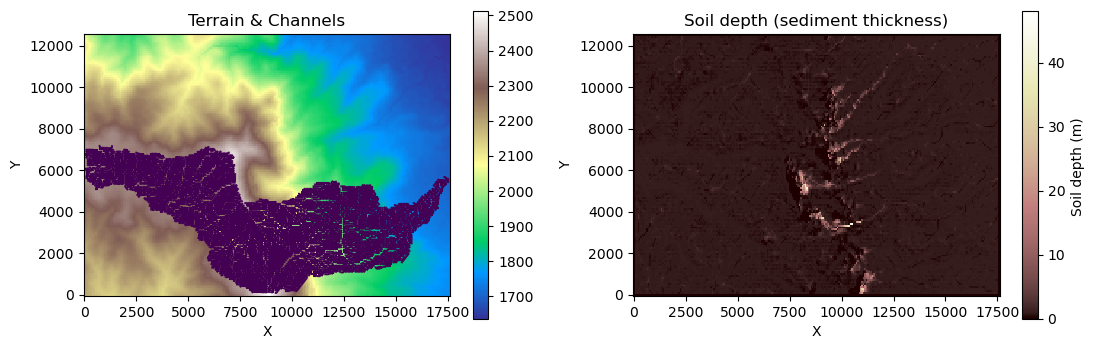

In [177]:
print("Post-Slide Real Landscape (BRL) - BAD CONNECTIVITY")
print("River start transport sediment through the main stream for 2000 years")
plt_landscape_evo(profiler3, mg3)

Post-Slide Real Landscape (BRL) - BAD CONNECTIVITY
River start transport sediment through the main stream for 2000 years


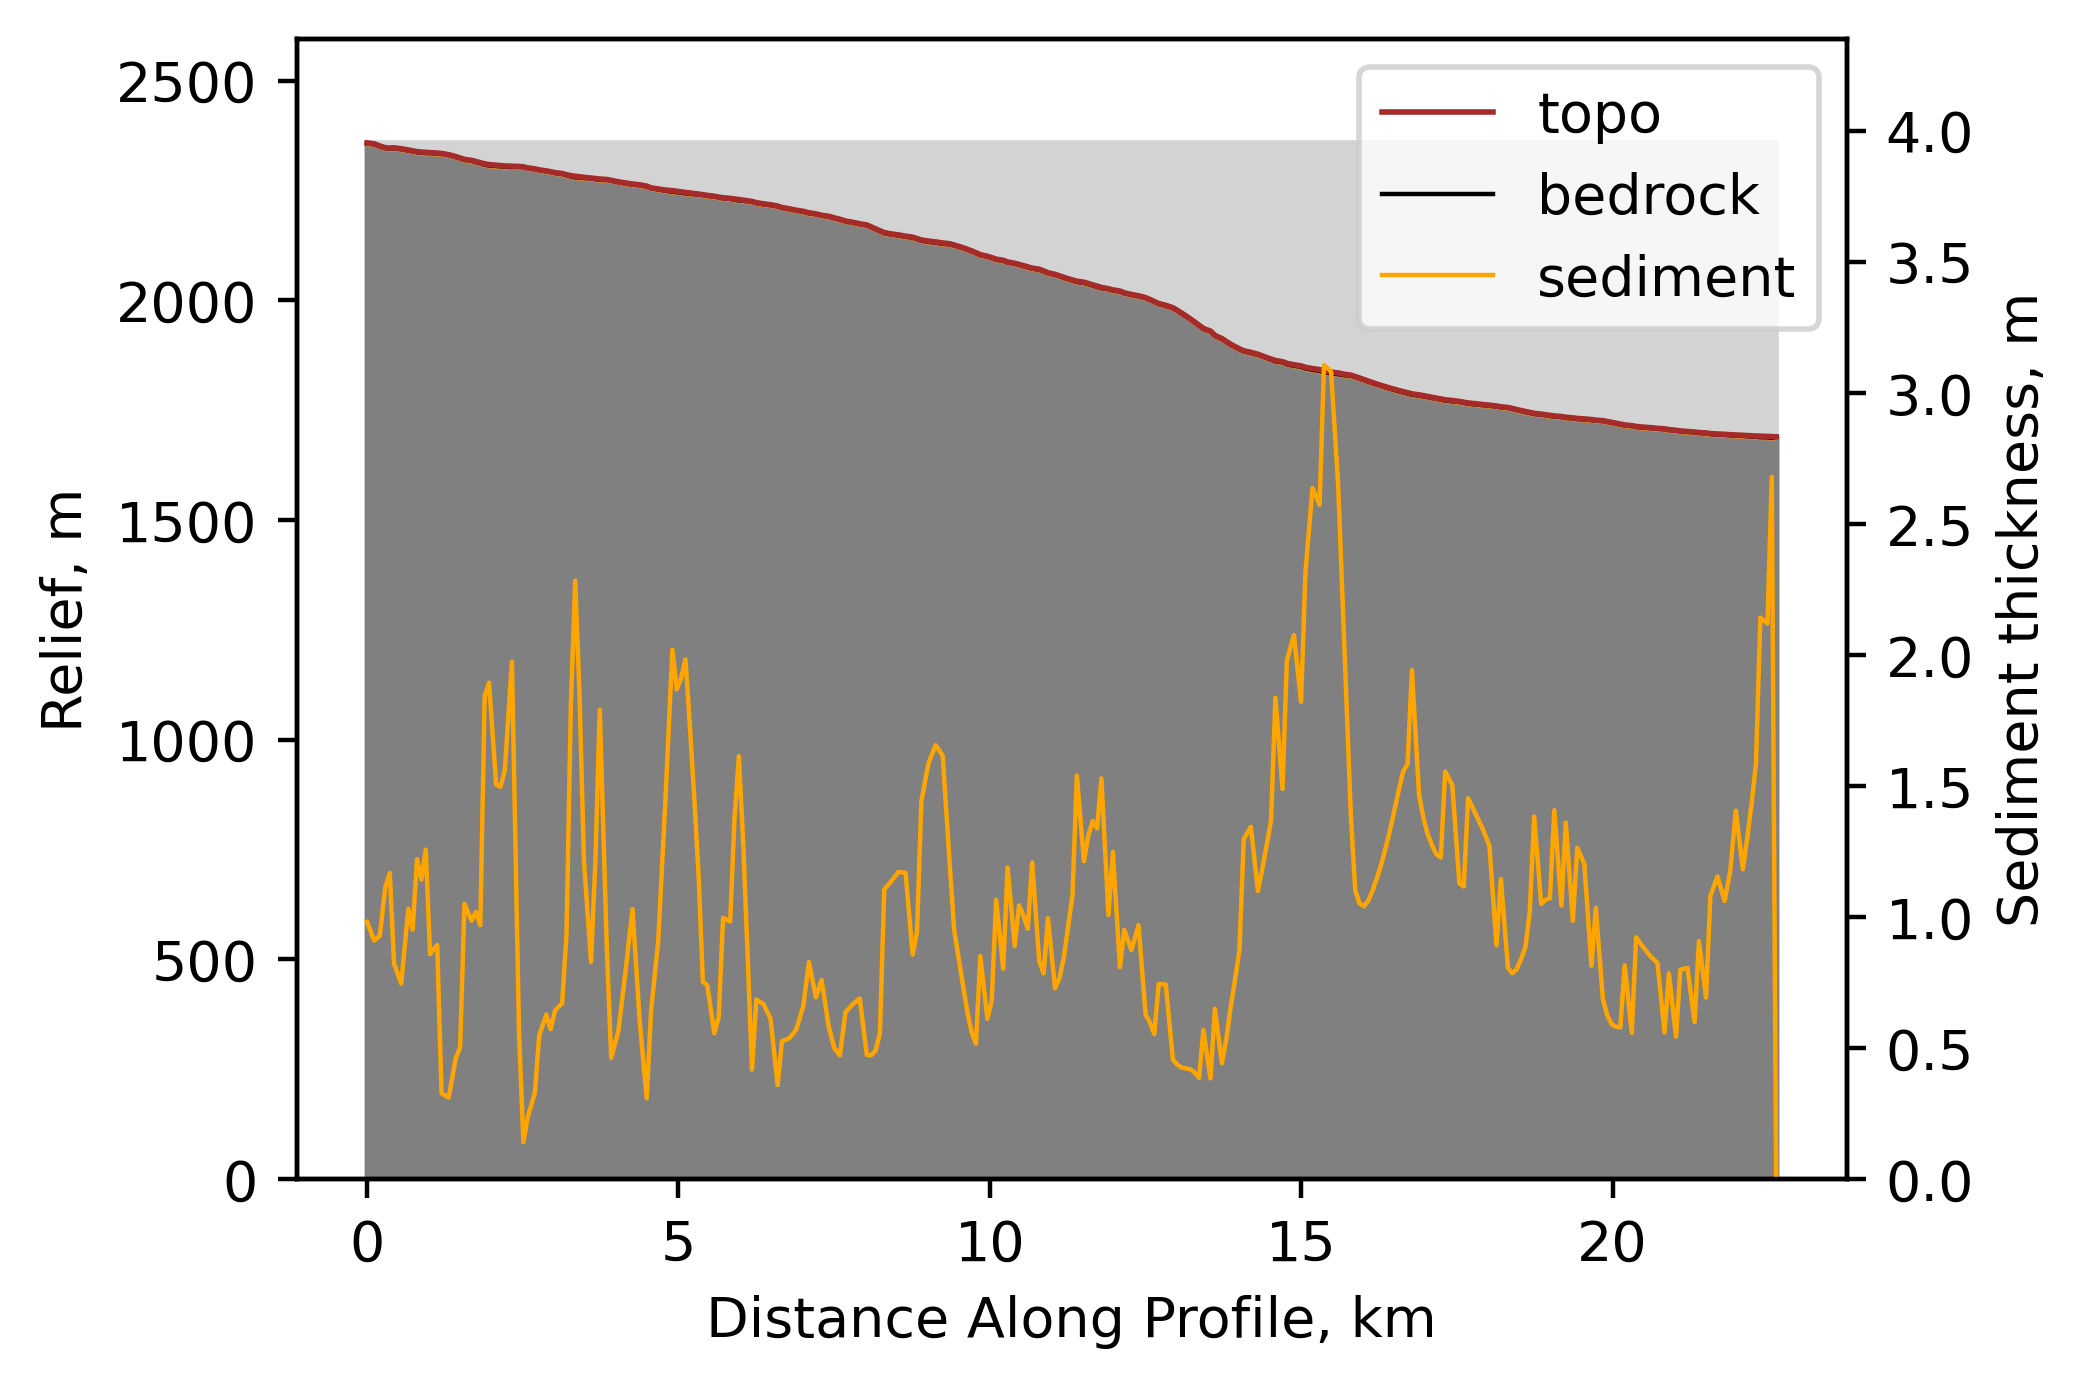

In [178]:
print("Post-Slide Real Landscape (BRL) - BAD CONNECTIVITY")
print("River start transport sediment through the main stream for 2000 years")
plot_profile_soil(mg3)

<hr>

### Load real landscape after a landslide event using **`MassWastingRunout`** (MWR)

In [170]:
# Import pickle file of real post-landslide landlab grid object
with open('post-slide_reallandscape_MWR.pickle', 'rb') as g:
    mg3 = pickle.load(g)

# Derive river network using ChannelProfiler
dx = node_spacing
area_threshold = dx*dx*10.
profiler3 = ChannelProfiler(mg3, number_of_watersheds=1, minimum_channel_threshold=area_threshold, main_channel_only=False)
profiler3.run_one_step()

ValueError: Required field 'drainage_area' not present. This field is required by the ChannelProfiler to define the start and stop of channel networks.

In [ ]:
print("Post-Slide Real Landscape (MWR) - BAD CONNECTIVITY")
print("Before river sediment transport and incision")
plt_landscape_evo(profiler3, mg3)

In [ ]:
print("Post-Slide Real Landscape (MWR) - BAD CONNECTIVITY")
print("Before river sediment transport and incision")
plot_profile_soil(mg3)

#### Run GravelBedrockEroder on imported post-landslide (MWR) landscape DEM

In [ ]:
# Instantiate flow router, with additional multiple flow director for hillslopes
fr = PriorityFloodFlowRouter(
    mg3,
    flow_metric="D8",
    separate_hill_flow=True,
    hill_flow_metric="Quinn",
    update_hill_flow_instantaneous=True,
)

# Instantiate GravelBedrockEroder (GBE)
eroder = GravelBedrockEroder(
    mg3, abrasion_coefficient=0.0005,
    coarse_fraction_from_plucking=0.1
)

In [ ]:
elev = mg3.at_node["topographic__elevation"]

eroder = GravelBedrockEroder(mg3, abrasion_coefficient=0.0005,
                            coarse_fraction_from_plucking=0.1)
rock_elev = mg3.at_node["bedrock__elevation"]
elev = mg3.at_node["topographic__elevation"]
#years_forward = mg.add_zeros["years_in_future", at = "node"]

for i in range(20):
     rock_elev[mg3.core_nodes] += 0.002
     elev[mg3.core_nodes] += 0.002
     fr.run_one_step()
     eroder.calc_sediment_rate_of_change(),
     eroder.run_one_step(100)

In [ ]:
# Derive river network using ChannelProfiler
dx = node_spacing
area_threshold = dx*dx*10.
profiler3 = ChannelProfiler(mg3, number_of_watersheds=1, minimum_channel_threshold=area_threshold, main_channel_only=False)
profiler3.run_one_step()

In [ ]:
print("Post-Slide Real Landscape (MWR) - BAD CONNECTIVITY")
print("River start transport sediment through the main stream for 2000 years")
plt_landscape_evo(profiler3, mg3)

In [ ]:
print("Post-Slide Real Landscape (MWR) - BAD CONNECTIVITY")
print("River start transport sediment through the main stream for 2000 years")
plot_profile_soil(mg3)

<hr>

### Summary of main findings
* Landslide derived sediments can be evaculated more quickly in high hillslope-channel connectivity scenrio.
* The evacuation of landslide-derived sediments in the low-connectivity scenario is on the order of 10^3 years
* The sediment pulse in the high-connectivity scenario appears to translate, whereas in the low-connectivity scenario the pulse appears to diffuse across the long profile.
* This notebook allows users to explore this landslide-fluvial interaction using either synthetic landscape or real landscape.